In [1]:
import warnings
warnings.simplefilter("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

In [3]:
# Displaying max columns and rows
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [4]:
df = pd.read_csv('train.csv')

In [5]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [6]:
df.shape

(1460, 81)

In [7]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Missing Value Treatment

In [9]:
# Checking the missing value percentage of those columns which contains missing value
null_cols = (df.isnull().sum())/len(df)*100
null_cols[null_cols>0]

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

#### Checking the value count of categories of missing value categorical columns and accordingly impute or delete(if found skewed). Also, wherever necessary, combining the categories of columns with comparatively smaller percentage of value counts

In [10]:
# Checking the value count percentage of 'Alley' column
df['Alley'].value_counts(normalize=True, dropna=False)

NaN     0.937671
Grvl    0.034247
Pave    0.028082
Name: Alley, dtype: float64

Here the missing cateogory is none but a category named 'No alley access' and which is coded as NA and due to which it is being captured as missing value. But since the column is skewed so dropping the column.

In [11]:
# Dropping the 'Alley' column
df.drop(['Alley'], axis=1, inplace=True)

In [12]:
# Checking the value count percentage of 'PoolQC' column
df['PoolQC'].value_counts(normalize=True, dropna=False)

NaN    0.995205
Gd     0.002055
Fa     0.001370
Ex     0.001370
Name: PoolQC, dtype: float64

Here the missing cateogory is none but a category named 'No Pool' and which is coded as NA and due to which it is being captured as missing value. But since the column is skewed so dropping the column.

In [13]:
# Dropping the 'PoolQC' column
df.drop(['PoolQC'], axis=1, inplace=True)

In [14]:
# Checking the value count percentage of 'Fence' column
df['Fence'].value_counts(normalize=True, dropna=False)

NaN      0.807534
MnPrv    0.107534
GdPrv    0.040411
GdWo     0.036986
MnWw     0.007534
Name: Fence, dtype: float64

Here the feature contain a category named NA, which means 'No Fence', which is around 80% of the data. But this 'NA' category has been captured as a 'Missing' category. So re-assigning this values to the category 'No_Fence'

In [15]:
# Imputing the missing value by re-assigning it to 'No_Fence' category
df['Fence'].fillna('No_Fence',inplace=True)

In [16]:
# Combining categories with percentage of value_counts less than 0.05 and then checking the final value_counts()
categories = df['Fence'].value_counts(normalize=True)
small_cat = categories[categories<0.05].index
df['Fence'] = df['Fence'].replace(small_cat,'Others')
df['Fence'].value_counts()

No_Fence    1179
MnPrv        157
Others       124
Name: Fence, dtype: int64

In [17]:
# Checking the value count percentage of 'MiscFeature' column
df['MiscFeature'].value_counts(normalize=True, dropna=False)

NaN     0.963014
Shed    0.033562
Gar2    0.001370
Othr    0.001370
TenC    0.000685
Name: MiscFeature, dtype: float64

Here the missing cateogory is nothing but a category named 'None' and which is coded as NA and due to which it is being captured as missing value. But since the column is skewed so dropping the column.

In [18]:
# Dropping the 'MiscFeature' column
df.drop(['MiscFeature'], axis=1, inplace=True)

In [19]:
# Checking the value count percentage of 'FireplaceQu' column
df['FireplaceQu'].value_counts(normalize=True, dropna=False)

NaN    0.472603
Gd     0.260274
TA     0.214384
Fa     0.022603
Ex     0.016438
Po     0.013699
Name: FireplaceQu, dtype: float64

Here the feature contain a category named NA, which means 'No Fireplace', which is around 47% of the data. But this 'NA' category has been captured as a 'Missing' category. So re-assigning this values to the category 'No_Fireplace'

In [20]:
# Imputing the missing value by re-assigning it to 'No_Fireplace' category
df['FireplaceQu'].fillna('No_Fireplace',inplace=True)

In [21]:
# Combining categories with percentage of value_counts less than 0.03 and then checking the final value_counts()
categories = df['FireplaceQu'].value_counts(normalize=True)
small_cat = categories[categories<0.03].index
df['FireplaceQu'] = df['FireplaceQu'].replace(small_cat,'Others')
df['FireplaceQu'].value_counts()

No_Fireplace    690
Gd              380
TA              313
Others           77
Name: FireplaceQu, dtype: int64

In [22]:
# Checking the value count percentage of 'MasVnrType' column
df['MasVnrType'].value_counts(normalize=True, dropna=False)

None       0.591781
BrkFace    0.304795
Stone      0.087671
BrkCmn     0.010274
NaN        0.005479
Name: MasVnrType, dtype: float64

In [23]:
# Imputing the missing value with the mode value
df['MasVnrType'].fillna(df['MasVnrType'].mode()[0], inplace=True)

In [24]:
# Combining categories with percentage of value_counts less than 0.09 and then checking the final value_counts()
categories = df['MasVnrType'].value_counts(normalize=True)
small_cat = categories[categories<0.09].index
df['MasVnrType'] = df['MasVnrType'].replace(small_cat,'Others')
df['MasVnrType'].value_counts()

None       872
BrkFace    445
Others     143
Name: MasVnrType, dtype: int64

In [25]:
# Checking the value count percentage of 'BsmtQual' column
df['BsmtQual'].value_counts(normalize=True, dropna=False)

TA     0.444521
Gd     0.423288
Ex     0.082877
NaN    0.025342
Fa     0.023973
Name: BsmtQual, dtype: float64

Here the feature contain a category named NA, which means 'No Basement'. But this 'NA' category has been captured as a 'Missing' category. So re-assigning this values to the category 'No_Basement'

In [26]:
# Imputing the missing value by re-assigning it to 'No_Basement' category
df['BsmtQual'].fillna('No_Basement',inplace=True)

In [27]:
# Checking the value count percentage of 'BsmtCond' column
df['BsmtCond'].value_counts(normalize=True, dropna=False)

TA     0.897945
Gd     0.044521
Fa     0.030822
NaN    0.025342
Po     0.001370
Name: BsmtCond, dtype: float64

Here the feature contain a category named NA, which means 'No Basement'. But this 'NA' category has been captured as a 'Missing' category. But since the column is skewed so dropping it.

In [28]:
# Dropping the 'BsmtCond' column
df.drop(['BsmtCond'], axis=1, inplace=True)

In [29]:
df['BsmtExposure'].value_counts(normalize=True, dropna=False)

No     0.652740
Av     0.151370
Gd     0.091781
Mn     0.078082
NaN    0.026027
Name: BsmtExposure, dtype: float64

Here the feature contain a category named NA, which means 'No Basement'. But this 'NA' category has been captured as a 'Missing' category. So re-assigning this values to the category 'No_Basement'

In [30]:
# Imputing the missing value by re-assigning it to 'No_Basement' category
df['BsmtExposure'].fillna('No_Basement',inplace=True)

In [31]:
# Checking the value count percentage of 'BsmtFinType1' column
df['BsmtFinType1'].value_counts(normalize=True, dropna=False)

Unf    0.294521
GLQ    0.286301
ALQ    0.150685
BLQ    0.101370
Rec    0.091096
LwQ    0.050685
NaN    0.025342
Name: BsmtFinType1, dtype: float64

Here the feature contain a category named NA, which means 'No Basement'. But this 'NA' category has been captured as a 'Missing' category. So re-assigning this values to the category 'No_Basement'

In [32]:
# Imputing the missing value by re-assigning it to 'No_Basement' category
df['BsmtFinType1'].fillna('No_Basement',inplace=True)

In [33]:
# Checking the value count percentage of 'BsmtFinType2' column
df['BsmtFinType2'].value_counts(normalize=True, dropna=False)

Unf    0.860274
Rec    0.036986
LwQ    0.031507
NaN    0.026027
BLQ    0.022603
ALQ    0.013014
GLQ    0.009589
Name: BsmtFinType2, dtype: float64

Here the feature contain a category named NA, which means 'No Basement'. But this 'NA' category has been captured as a 'Missing' category. But since the column is skewed so dropping the column

In [34]:
# Dropping the 'BsmtFinType2' column
df.drop(['BsmtFinType2'], axis=1, inplace=True)

In [35]:
# Checking the value count percentage of 'Electrical' column
df['Electrical'].value_counts(normalize=True, dropna=False)

SBrkr    0.913699
FuseA    0.064384
FuseF    0.018493
FuseP    0.002055
Mix      0.000685
NaN      0.000685
Name: Electrical, dtype: float64

In [36]:
# Dropping the 'MiscFeature' column as the column is skewed
df.drop(['Electrical'], axis=1, inplace=True)

In [37]:
# Checking the value count percentage of 'GarageType' column
df['GarageType'].value_counts(normalize=True, dropna=False)

Attchd     0.595890
Detchd     0.265068
BuiltIn    0.060274
NaN        0.055479
Basment    0.013014
CarPort    0.006164
2Types     0.004110
Name: GarageType, dtype: float64

Here the feature contain a category named NA, which means 'No Garage'. But this 'NA' category has been captured as a 'Missing' category. So re-assigning this values to the category 'No_Garage'

In [38]:
# Imputing the missing value by re-assigning it to 'No_Garage' category
df['GarageType'].fillna('No_Garage',inplace=True)

In [39]:
# Combining categories with percentage of value_counts less than 0.02 and then checking the final value_counts()
categories = df['GarageType'].value_counts(normalize=True)
small_cat = categories[categories<0.02].index
df['GarageType'] = df['GarageType'].replace(small_cat,'Others')
df['GarageType'].value_counts()

Attchd       870
Detchd       387
BuiltIn       88
No_Garage     81
Others        34
Name: GarageType, dtype: int64

In [40]:
# Checking the value count percentage of 'GarageFinish' column
df['GarageFinish'].value_counts(normalize=True, dropna=False)

Unf    0.414384
RFn    0.289041
Fin    0.241096
NaN    0.055479
Name: GarageFinish, dtype: float64

Here the feature contain a category named NA, which means 'No Garage'. But this 'NA' category has been captured as a 'Missing' category. So re-assigning this values to the category 'No_Garage'

In [41]:
# Imputing the missing value by re-assigning it to 'No_Garage' category
df['GarageFinish'].fillna('No_Garage',inplace=True)

In [42]:
# Checking the value count percentage of 'GarageQual' column
df['GarageQual'].value_counts(normalize=True, dropna=False)

TA     0.897945
NaN    0.055479
Fa     0.032877
Gd     0.009589
Ex     0.002055
Po     0.002055
Name: GarageQual, dtype: float64

Here the missing cateogory is nothing but a category named 'No Garage' and which is coded as NA and due to which it is being captured as missing value. But since the column is skewed so dropping the column.

In [43]:
# Dropping the 'GarageQual' column
df.drop(['GarageQual'], axis=1, inplace=True)

In [44]:
# Checking the value count percentage of 'GarageCond' column
df['GarageCond'].value_counts(normalize=True, dropna=False)

TA     0.908219
NaN    0.055479
Fa     0.023973
Gd     0.006164
Po     0.004795
Ex     0.001370
Name: GarageCond, dtype: float64

Here the missing cateogory is nothing but a category named 'No Garage' and which is coded as NA and due to which it is being captured as missing value. But since the column is skewed so dropping the column.

In [45]:
# Dropping the 'GarageCond' column
df.drop(['GarageCond'], axis=1, inplace=True)

#### Imputing the missing value of the numerical columns

In [46]:
# Imputing the missing value of 'LotFrontage' column with its median
df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)

In [47]:
# Imputing the missing value of 'MasVnrArea' column with its median
df['MasVnrArea'].fillna(df['MasVnrArea'].median(), inplace=True)

In [48]:
# Checking for missing values, if any
df.isnull().sum().sum()

81

#### Checking the value counts of other categorical columns for skewness and drop if found highly skewed. Also, wherever necessary, combining the value counts of categories with comparatively smaller percentage of value counts

In [49]:
# Checking the value count percentage of 'MSZoning' column
df['MSZoning'].value_counts(normalize=True, dropna=False)

RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64

In [50]:
# Combining categories with percentage of value_counts less than 0.05 and then checking the final value_counts()
categories = df['MSZoning'].value_counts(normalize=True)
small_cat = categories[categories<0.05].index
df['MSZoning'] = df['MSZoning'].replace(small_cat,'Others')
df['MSZoning'].value_counts()

RL        1151
RM         218
Others      91
Name: MSZoning, dtype: int64

In [51]:
# Checking the value count percentage of 'Street' column
df['Street'].value_counts(normalize=True, dropna=False)

Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64

In [52]:
# Dropping the 'Street' column as because the column is skewed
df.drop(['Street'], axis=1, inplace=True)

In [53]:
# Checking the value count percentage of 'LotShape' column
df['LotShape'].value_counts(normalize=True, dropna=False)

Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64

In [54]:
# Combining categories with percentage of value_counts less than 0.03 and then checking the final value_counts()
categories = df['LotShape'].value_counts(normalize=True)
small_cat = categories[categories<0.03].index
df['LotShape'] = df['LotShape'].replace(small_cat,'Others')
df['LotShape'].value_counts()

Reg       925
IR1       484
Others     51
Name: LotShape, dtype: int64

In [55]:
# Checking the value count percentage of 'LandContour' column
df['LandContour'].value_counts(normalize=True, dropna=False)

Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64

In [56]:
# Dropping the 'LandContour' column as because the column is skewed
df.drop(['LandContour'], axis=1, inplace=True)

In [57]:
# Checking the value count percentage of 'Utilities' column
df['Utilities'].value_counts(normalize=True, dropna=False)

AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64

In [58]:
# Dropping the 'Utilities' column as because the column is skewed
df.drop(['Utilities'], axis=1, inplace=True)

In [59]:
# Checking the value count percentage of 'LotConfig' column
df['LotConfig'].value_counts(normalize=True, dropna=False)

Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: LotConfig, dtype: float64

In [60]:
# Combining categories with percentage of value_counts less than 0.07 and then checking the final value_counts()
categories = df['LotConfig'].value_counts(normalize=True)
small_cat = categories[categories<0.07].index
df['LotConfig'] = df['LotConfig'].replace(small_cat,'Others')
df['LotConfig'].value_counts()

Inside    1052
Corner     263
Others     145
Name: LotConfig, dtype: int64

In [61]:
# Checking the value count percentage of 'LandSlope' column
df['LandSlope'].value_counts(normalize=True, dropna=False)

Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: LandSlope, dtype: float64

In [62]:
# Dropping the 'LandSlope' column as because the column is skewed
df.drop(['LandSlope'], axis=1, inplace=True)

In [63]:
# Checking the value count percentage of 'Neighborhood' column
df['Neighborhood'].value_counts(normalize=True, dropna=False)

NAmes      0.154110
CollgCr    0.102740
OldTown    0.077397
Edwards    0.068493
Somerst    0.058904
Gilbert    0.054110
NridgHt    0.052740
Sawyer     0.050685
NWAmes     0.050000
SawyerW    0.040411
BrkSide    0.039726
Crawfor    0.034932
Mitchel    0.033562
NoRidge    0.028082
Timber     0.026027
IDOTRR     0.025342
ClearCr    0.019178
StoneBr    0.017123
SWISU      0.017123
MeadowV    0.011644
Blmngtn    0.011644
BrDale     0.010959
Veenker    0.007534
NPkVill    0.006164
Blueste    0.001370
Name: Neighborhood, dtype: float64

In [64]:
# Combining categories with percentage of value_counts less than 0.01 and then checking the final value_counts()
categories = df['Neighborhood'].value_counts(normalize=True)
small_cat = categories[categories<0.01].index
df['Neighborhood'] = df['Neighborhood'].replace(small_cat,'Others')
df['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Others      22
Blmngtn     17
MeadowV     17
BrDale      16
Name: Neighborhood, dtype: int64

In [65]:
# Checking the value count percentage of 'Condition1' column
df['Condition1'].value_counts(normalize=True, dropna=False)

Norm      0.863014
Feedr     0.055479
Artery    0.032877
RRAn      0.017808
PosN      0.013014
RRAe      0.007534
PosA      0.005479
RRNn      0.003425
RRNe      0.001370
Name: Condition1, dtype: float64

In [66]:
# Dropping the 'Condition1' column as because the column is skewed
df.drop(['Condition1'], axis=1, inplace=True)

In [67]:
# Checking the value count percentage of 'Condition2' column
df['Condition2'].value_counts(normalize=True, dropna=False)

Norm      0.989726
Feedr     0.004110
Artery    0.001370
PosN      0.001370
RRNn      0.001370
PosA      0.000685
RRAe      0.000685
RRAn      0.000685
Name: Condition2, dtype: float64

In [68]:
# Dropping the 'Condition2' column as because the column is skewed
df.drop(['Condition2'], axis=1, inplace=True)

In [69]:
# Checking the value count percentage of 'BldgType' column
df['BldgType'].value_counts(normalize=True, dropna=False)

1Fam      0.835616
TwnhsE    0.078082
Duplex    0.035616
Twnhs     0.029452
2fmCon    0.021233
Name: BldgType, dtype: float64

In [70]:
# Combining categories with percentage of value_counts less than 0.04 and then checking the final value_counts()
categories = df['BldgType'].value_counts(normalize=True)
small_cat = categories[categories<0.04].index
df['BldgType'] = df['BldgType'].replace(small_cat,'Others')
df['BldgType'].value_counts()

1Fam      1220
Others     126
TwnhsE     114
Name: BldgType, dtype: int64

In [71]:
# Checking the value count percentage of 'HouseStyle' column
df['HouseStyle'].value_counts(normalize=True, dropna=False)

1Story    0.497260
2Story    0.304795
1.5Fin    0.105479
SLvl      0.044521
SFoyer    0.025342
1.5Unf    0.009589
2.5Unf    0.007534
2.5Fin    0.005479
Name: HouseStyle, dtype: float64

In [72]:
# Combining categories with percentage of value_counts less than 0.03 and then checking the final value_counts()
categories = df['HouseStyle'].value_counts(normalize=True)
small_cat = categories[categories<0.03].index
df['HouseStyle'] = df['HouseStyle'].replace(small_cat,'Others')
df['HouseStyle'].value_counts()

1Story    726
2Story    445
1.5Fin    154
Others     70
SLvl       65
Name: HouseStyle, dtype: int64

In [73]:
# Checking the value count percentage of 'OverallQual' column
df['OverallQual'].value_counts(normalize=True, dropna=False)

5     0.271918
6     0.256164
7     0.218493
8     0.115068
4     0.079452
9     0.029452
3     0.013699
10    0.012329
2     0.002055
1     0.001370
Name: OverallQual, dtype: float64

In [74]:
# Combining categories with percentage of value_counts less than 0.03 and then checking the final value_counts()
categories = df['OverallQual'].value_counts(normalize=True)
small_cat = categories[categories<0.03].index
df['OverallQual'] = df['OverallQual'].replace(small_cat,'Others')
df['OverallQual'].value_counts()

5         397
6         374
7         319
8         168
4         116
Others     86
Name: OverallQual, dtype: int64

In [75]:
# Checking the value count percentage of 'OverallCond' column
df['OverallCond'].value_counts(normalize=True, dropna=False)

5    0.562329
6    0.172603
7    0.140411
8    0.049315
4    0.039041
3    0.017123
9    0.015068
2    0.003425
1    0.000685
Name: OverallCond, dtype: float64

In [76]:
# Checking the value count percentage of 'RoofStyle' column
df['RoofStyle'].value_counts(normalize=True, dropna=False)

Gable      0.781507
Hip        0.195890
Flat       0.008904
Gambrel    0.007534
Mansard    0.004795
Shed       0.001370
Name: RoofStyle, dtype: float64

In [77]:
# Combining categories with percentage of value_counts less than 0.01 and then checking the final value_counts()
categories = df['RoofStyle'].value_counts(normalize=True)
small_cat = categories[categories<0.01].index
df['RoofStyle'] = df['RoofStyle'].replace(small_cat,'Others')
df['RoofStyle'].value_counts()

Gable     1141
Hip        286
Others      33
Name: RoofStyle, dtype: int64

In [78]:
# Checking the value count percentage of 'RoofMatl' column
df['RoofMatl'].value_counts(normalize=True, dropna=False)

CompShg    0.982192
Tar&Grv    0.007534
WdShngl    0.004110
WdShake    0.003425
ClyTile    0.000685
Metal      0.000685
Membran    0.000685
Roll       0.000685
Name: RoofMatl, dtype: float64

In [79]:
# Dropping the 'RoofMatl' column as because the column is skewed
df.drop(['RoofMatl'], axis=1, inplace=True)

In [80]:
# Checking the value count percentage of 'Exterior1st' column
df['Exterior1st'].value_counts(normalize=True, dropna=False)

VinylSd    0.352740
HdBoard    0.152055
MetalSd    0.150685
Wd Sdng    0.141096
Plywood    0.073973
CemntBd    0.041781
BrkFace    0.034247
WdShing    0.017808
Stucco     0.017123
AsbShng    0.013699
Stone      0.001370
BrkComm    0.001370
ImStucc    0.000685
CBlock     0.000685
AsphShn    0.000685
Name: Exterior1st, dtype: float64

In [81]:
# Combining categories with percentage of value_counts less than 0.02 and then checking the final value_counts()
categories = df['Exterior1st'].value_counts(normalize=True)
small_cat = categories[categories<0.02].index
df['Exterior1st'] = df['Exterior1st'].replace(small_cat,'Others')
df['Exterior1st'].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
Others      78
CemntBd     61
BrkFace     50
Name: Exterior1st, dtype: int64

In [82]:
# Checking the value count percentage of 'Exterior2nd' column
df['Exterior2nd'].value_counts(normalize=True, dropna=False)

VinylSd    0.345205
MetalSd    0.146575
HdBoard    0.141781
Wd Sdng    0.134932
Plywood    0.097260
CmentBd    0.041096
Wd Shng    0.026027
Stucco     0.017808
BrkFace    0.017123
AsbShng    0.013699
ImStucc    0.006849
Brk Cmn    0.004795
Stone      0.003425
AsphShn    0.002055
Other      0.000685
CBlock     0.000685
Name: Exterior2nd, dtype: float64

In [83]:
# Combining categories with percentage of value_counts less than 0.02 and then checking the final value_counts()
categories = df['Exterior2nd'].value_counts(normalize=True)
small_cat = categories[categories<0.02].index
df['Exterior2nd'] = df['Exterior2nd'].replace(small_cat,'Others')
df['Exterior2nd'].value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
Others      98
CmentBd     60
Wd Shng     38
Name: Exterior2nd, dtype: int64

In [84]:
# Checking the value count percentage of 'ExterQual' column
df['ExterQual'].value_counts(normalize=True, dropna=False)

TA    0.620548
Gd    0.334247
Ex    0.035616
Fa    0.009589
Name: ExterQual, dtype: float64

In [85]:
# Combining categories with percentage of value_counts less than 0.04 and then checking the final value_counts()
categories = df['ExterQual'].value_counts(normalize=True)
small_cat = categories[categories<0.04].index
df['ExterQual'] = df['ExterQual'].replace(small_cat,'Others')
df['ExterQual'].value_counts()

TA        906
Gd        488
Others     66
Name: ExterQual, dtype: int64

In [86]:
# Checking the value count percentage of 'ExterCond' column
df['ExterCond'].value_counts(normalize=True, dropna=False)

TA    0.878082
Gd    0.100000
Fa    0.019178
Ex    0.002055
Po    0.000685
Name: ExterCond, dtype: float64

In [87]:
# Dropping the 'ExterCond' column as because the column is skewed
df.drop(['ExterCond'], axis=1, inplace=True)

In [88]:
# Checking the value count percentage of 'Foundation' column
df['Foundation'].value_counts(normalize=True, dropna=False)

PConc     0.443151
CBlock    0.434247
BrkTil    0.100000
Slab      0.016438
Stone     0.004110
Wood      0.002055
Name: Foundation, dtype: float64

In [89]:
# Combining categories with percentage of value_counts less than 0.02 and then checking the final value_counts()
categories = df['Foundation'].value_counts(normalize=True)
small_cat = categories[categories<0.02].index
df['Foundation'] = df['Foundation'].replace(small_cat,'Others')
df['Foundation'].value_counts()

PConc     647
CBlock    634
BrkTil    146
Others     33
Name: Foundation, dtype: int64

In [90]:
# Checking the value count percentage of 'Heating' column
df['Heating'].value_counts(normalize=True, dropna=False)

GasA     0.978082
GasW     0.012329
Grav     0.004795
Wall     0.002740
OthW     0.001370
Floor    0.000685
Name: Heating, dtype: float64

In [91]:
# Dropping the 'Heating' column as because the column is skewed
df.drop(['Heating'], axis=1, inplace=True)

In [92]:
# Checking the value count percentage of 'HeatingQC	' column
df['HeatingQC'].value_counts(normalize=True, dropna=False)

Ex    0.507534
TA    0.293151
Gd    0.165068
Fa    0.033562
Po    0.000685
Name: HeatingQC, dtype: float64

In [93]:
# Combining categories with percentage of value_counts less than 0.04 and then checking the final value_counts()
categories = df['HeatingQC'].value_counts(normalize=True)
small_cat = categories[categories<0.04].index
df['HeatingQC'] = df['HeatingQC'].replace(small_cat,'Others')
df['HeatingQC'].value_counts()

Ex        741
TA        428
Gd        241
Others     50
Name: HeatingQC, dtype: int64

In [94]:
# Checking the value count percentage of 'CentralAir' column
df['CentralAir'].value_counts(normalize=True, dropna=False)

Y    0.934932
N    0.065068
Name: CentralAir, dtype: float64

In [95]:
# Dropping the 'CentralAir' column as because the column is skewed
df.drop(['CentralAir'], axis=1, inplace=True)

In [96]:
# Checking the value count percentage of 'KitchenQual' column
df['KitchenQual'].value_counts(normalize=True, dropna=False)

TA    0.503425
Gd    0.401370
Ex    0.068493
Fa    0.026712
Name: KitchenQual, dtype: float64

In [97]:
# Combining categories with percentage of value_counts less than 0.07 and then checking the final value_counts()
categories = df['KitchenQual'].value_counts(normalize=True)
small_cat = categories[categories<0.07].index
df['KitchenQual'] = df['KitchenQual'].replace(small_cat,'Others')
df['KitchenQual'].value_counts()

TA        735
Gd        586
Others    139
Name: KitchenQual, dtype: int64

In [98]:
# Checking the value count percentage of 'Functional' column
df['Functional'].value_counts(normalize=True, dropna=False)

Typ     0.931507
Min2    0.023288
Min1    0.021233
Mod     0.010274
Maj1    0.009589
Maj2    0.003425
Sev     0.000685
Name: Functional, dtype: float64

In [99]:
# Dropping the 'Functional' column as because the column is skewed
df.drop(['Functional'], axis=1, inplace=True)

In [100]:
# Checking the value count percentage of 'PavedDrive' column
df['PavedDrive'].value_counts(normalize=True, dropna=False)

Y    0.917808
N    0.061644
P    0.020548
Name: PavedDrive, dtype: float64

In [101]:
# Dropping the 'PavedDrive' column as because the column is skewed
df.drop(['PavedDrive'], axis=1, inplace=True)

In [102]:
# Checking the value count percentage of 'SaleType' column
df['SaleType'].value_counts(normalize=True, dropna=False)

WD       0.867808
New      0.083562
COD      0.029452
ConLD    0.006164
ConLw    0.003425
ConLI    0.003425
CWD      0.002740
Oth      0.002055
Con      0.001370
Name: SaleType, dtype: float64

In [103]:
# Dropping the 'SaleType' column as because the column is skewed
df.drop(['SaleType'], axis=1, inplace=True)

In [104]:
# Checking the value count percentage of 'SaleCondition' column
df['SaleCondition'].value_counts(normalize=True, dropna=False)

Normal     0.820548
Partial    0.085616
Abnorml    0.069178
Family     0.013699
Alloca     0.008219
AdjLand    0.002740
Name: SaleCondition, dtype: float64

In [105]:
# Combining categories with percentage of value_counts less than 0.02 and then checking the final value_counts()
categories = df['SaleCondition'].value_counts(normalize=True)
small_cat = categories[categories<0.02].index
df['SaleCondition'] = df['SaleCondition'].replace(small_cat,'Others')
df['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Others       36
Name: SaleCondition, dtype: int64

In [106]:
# Checking the value count percentage of 'MSSubClass' column
df['MSSubClass'].value_counts(normalize=True, dropna=False)

20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: MSSubClass, dtype: float64

In [107]:
# Combining categories with percentage of value_counts less than 0.02 and then checking the final value_counts()
categories = df['MSSubClass'].value_counts(normalize=True)
small_cat = categories[categories<0.02].index
df['MSSubClass'] = df['MSSubClass'].replace(small_cat,'Others')
df['MSSubClass'].value_counts()

20        536
60        299
50        144
120        87
30         69
160        63
Others     62
70         60
80         58
90         52
190        30
Name: MSSubClass, dtype: int64

In [108]:
# Checking the head
df.head()

Id MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
0   1         60       RL         65.0     8450      Reg    Inside   
1   2         20       RL         80.0     9600      Reg    Others   
2   3         60       RL         68.0    11250      IR1    Inside   
3   4         70       RL         60.0     9550      IR1    Corner   
4   5         60       RL         84.0    14260      IR1    Others   

  Neighborhood BldgType HouseStyle OverallQual  OverallCond  YearBuilt  \
0      CollgCr     1Fam     2Story           7            5       2003   
1       Others     1Fam     1Story           6            8       1976   
2      CollgCr     1Fam     2Story           7            5       2001   
3      Crawfor     1Fam     2Story           7            5       1915   
4      NoRidge     1Fam     2Story           8            5       2000   

   YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
0          2003     Gable     VinylSd     VinylSd    BrkFace       196.0   
1          1976     Gable     MetalSd     MetalSd       None         0.0   
2          2002     Gable     VinylSd     VinylSd    BrkFace       162.0   
3          1970     Gable     Wd Sdng     Wd Shng       None         0.0   
4          2000     Gable     VinylSd     VinylSd    BrkFace       350.0   

  ExterQual Foundation BsmtQual BsmtExposure BsmtFinType1  BsmtFinSF1  \
0        Gd      PConc       Gd           No          GLQ         706   
1        TA     CBlock       Gd           Gd          ALQ         978   
2        Gd      PConc       Gd           Mn          GLQ         486   
3        TA     BrkTil       TA           No          ALQ         216   
4        Gd      PConc       Gd           Av          GLQ         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF HeatingQC  1stFlrSF  2ndFlrSF  \
0           0        150          856        Ex       856       854   
1           0        284         1262        Ex      1262         0   
2           0        434          920        Ex       920       866   
3           0        540          756        Gd       961       756   
4           0        490         1145        Ex      1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   
2             0       1786             1             0         2         1   
3             0       1717             1             0         1         0   
4             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd  Fireplaces  \
0             3             1          Gd             8           0   
1             3             1          TA             6           1   
2             3             1          Gd             6           1   
3             3             1          Gd             7           1   
4             4             1          Gd             9           1   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
0  No_Fireplace     Attchd       2003.0          RFn           2         548   
1            TA     Attchd       1976.0          RFn           2         460   
2            TA     Attchd       2001.0          RFn           2         608   
3            Gd     Detchd       1998.0          Unf           3         642   
4            TA     Attchd       2000.0          RFn           3         836   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0           0           61              0          0            0         0   
1         298            0              0          0            0         0   
2           0           42              0          0            0         0   
3           0           35            272          0            0         0   
4         192           84              0 

In [109]:
# Checking the dimension
df.shape

(1460, 60)

In [110]:
# Dropping the Id, YearRemodAdd, YrSold and GarageYrBlt columns
df.drop(['Id', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis=1, inplace=True)

In [111]:
# Creating a new column 'Age' by substracting the column YearBuilt from 2021(current year) and dropping the 'YearBuilt' column.
df['Age'] = 2021-df['YearBuilt']
df.drop('YearBuilt', axis=1, inplace=True)

In [112]:
# Checking the dimension
df.shape

(1460, 56)

In [113]:
# Checking the head
df.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood  \
0         60       RL         65.0     8450      Reg    Inside      CollgCr   
1         20       RL         80.0     9600      Reg    Others       Others   
2         60       RL         68.0    11250      IR1    Inside      CollgCr   
3         70       RL         60.0     9550      IR1    Corner      Crawfor   
4         60       RL         84.0    14260      IR1    Others      NoRidge   

  BldgType HouseStyle OverallQual  OverallCond RoofStyle Exterior1st  \
0     1Fam     2Story           7            5     Gable     VinylSd   
1     1Fam     1Story           6            8     Gable     MetalSd   
2     1Fam     2Story           7            5     Gable     VinylSd   
3     1Fam     2Story           7            5     Gable     Wd Sdng   
4     1Fam     2Story           8            5     Gable     VinylSd   

  Exterior2nd MasVnrType  MasVnrArea ExterQual Foundation BsmtQual  \
0     VinylSd    BrkFace       196.0        Gd      PConc       Gd   
1     MetalSd       None         0.0        TA     CBlock       Gd   
2     VinylSd    BrkFace       162.0        Gd      PConc       Gd   
3     Wd Shng       None         0.0        TA     BrkTil       TA   
4     VinylSd    BrkFace       350.0        Gd      PConc       Gd   

  BsmtExposure BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0           No          GLQ         706           0        150          856   
1           Gd          ALQ         978           0        284         1262   
2           Mn          GLQ         486           0        434          920   
3           No          ALQ         216           0        540          756   
4           Av          GLQ         655           0        490         1145   

  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0        Ex       856       854             0       1710             1   
1        Ex      1262         0             0       1262             0   
2        Ex       920       866             0       1786             1   
3        Gd       961       756             0       1717             1   
4        Ex      1145      1053             0       2198             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
0             0         2         1             3             1          Gd   
1             1         2         0             3             1          TA   
2             0         2         1             3             1          Gd   
3             0         1         0             3             1          Gd   
4             0         2         1             4             1          Gd   

   TotRmsAbvGrd  Fireplaces   FireplaceQu GarageType GarageFinish  GarageCars  \
0             8           0  No_Fireplace     Attchd          RFn           2   
1             6           1            TA     Attchd          RFn           2   
2             6           1            TA     Attchd          RFn           2   
3             7           1            Gd     Detchd          Unf           3   
4             9           1            TA     Attchd          RFn           3   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0         548           0           61              0          0            0   
1         460         298            0              0          0            0   
2         608           0           42              0          0            0   
3         642           0           35            272          0            0   
4         836         192           84              0          0            0   

   PoolArea     Fence  MiscVal  MoSold SaleCondition  SalePrice  Age  
0         0  No_Fence        0       2        Normal     208500   18  
1         0  No_Fence        0       5        Normal     181500   45  
2         0  No_Fence        0       9        Normal     223500   20  
3         0  No_Fenc

### Checking for the normality of target variable

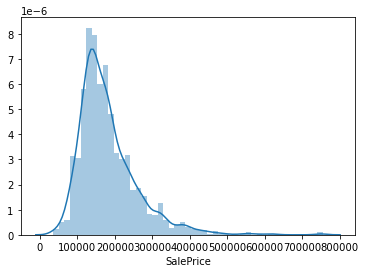

In [114]:
# Plotting a distribution plot of the target variable 'SalePrice'
sns.distplot(df.SalePrice)
plt.show()

As we have seen the target variable is left skewed, so to normalize it we apply log transformation on the target variable 'SalePrice'.

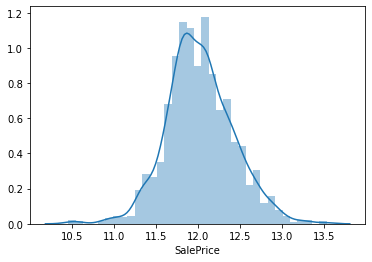

In [115]:
# Applying log transformation on 'SalePrice' variable and then plotting a distribution plot of the same
df['SalePrice'] = np.log(df['SalePrice'])
sns.distplot(df.SalePrice)
plt.show()

In [116]:
# Checking the head
df.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood  \
0         60       RL         65.0     8450      Reg    Inside      CollgCr   
1         20       RL         80.0     9600      Reg    Others       Others   
2         60       RL         68.0    11250      IR1    Inside      CollgCr   
3         70       RL         60.0     9550      IR1    Corner      Crawfor   
4         60       RL         84.0    14260      IR1    Others      NoRidge   

  BldgType HouseStyle OverallQual  OverallCond RoofStyle Exterior1st  \
0     1Fam     2Story           7            5     Gable     VinylSd   
1     1Fam     1Story           6            8     Gable     MetalSd   
2     1Fam     2Story           7            5     Gable     VinylSd   
3     1Fam     2Story           7            5     Gable     Wd Sdng   
4     1Fam     2Story           8            5     Gable     VinylSd   

  Exterior2nd MasVnrType  MasVnrArea ExterQual Foundation BsmtQual  \
0     VinylSd    BrkFace       196.0        Gd      PConc       Gd   
1     MetalSd       None         0.0        TA     CBlock       Gd   
2     VinylSd    BrkFace       162.0        Gd      PConc       Gd   
3     Wd Shng       None         0.0        TA     BrkTil       TA   
4     VinylSd    BrkFace       350.0        Gd      PConc       Gd   

  BsmtExposure BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0           No          GLQ         706           0        150          856   
1           Gd          ALQ         978           0        284         1262   
2           Mn          GLQ         486           0        434          920   
3           No          ALQ         216           0        540          756   
4           Av          GLQ         655           0        490         1145   

  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0        Ex       856       854             0       1710             1   
1        Ex      1262         0             0       1262             0   
2        Ex       920       866             0       1786             1   
3        Gd       961       756             0       1717             1   
4        Ex      1145      1053             0       2198             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
0             0         2         1             3             1          Gd   
1             1         2         0             3             1          TA   
2             0         2         1             3             1          Gd   
3             0         1         0             3             1          Gd   
4             0         2         1             4             1          Gd   

   TotRmsAbvGrd  Fireplaces   FireplaceQu GarageType GarageFinish  GarageCars  \
0             8           0  No_Fireplace     Attchd          RFn           2   
1             6           1            TA     Attchd          RFn           2   
2             6           1            TA     Attchd          RFn           2   
3             7           1            Gd     Detchd          Unf           3   
4             9           1            TA     Attchd          RFn           3   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0         548           0           61              0          0            0   
1         460         298            0              0          0            0   
2         608           0           42              0          0            0   
3         642           0           35            272          0            0   
4         836         192           84              0          0            0   

   PoolArea     Fence  MiscVal  MoSold SaleCondition  SalePrice  Age  
0         0  No_Fence        0       2        Normal  12.247694   18  
1         0  No_Fence        0       5        Normal  12.109011   45  
2         0  No_Fence        0       9        Normal  12.317167   20  
3         0  No_Fenc

### Checking for outliers and performing outlier treatment thereafter

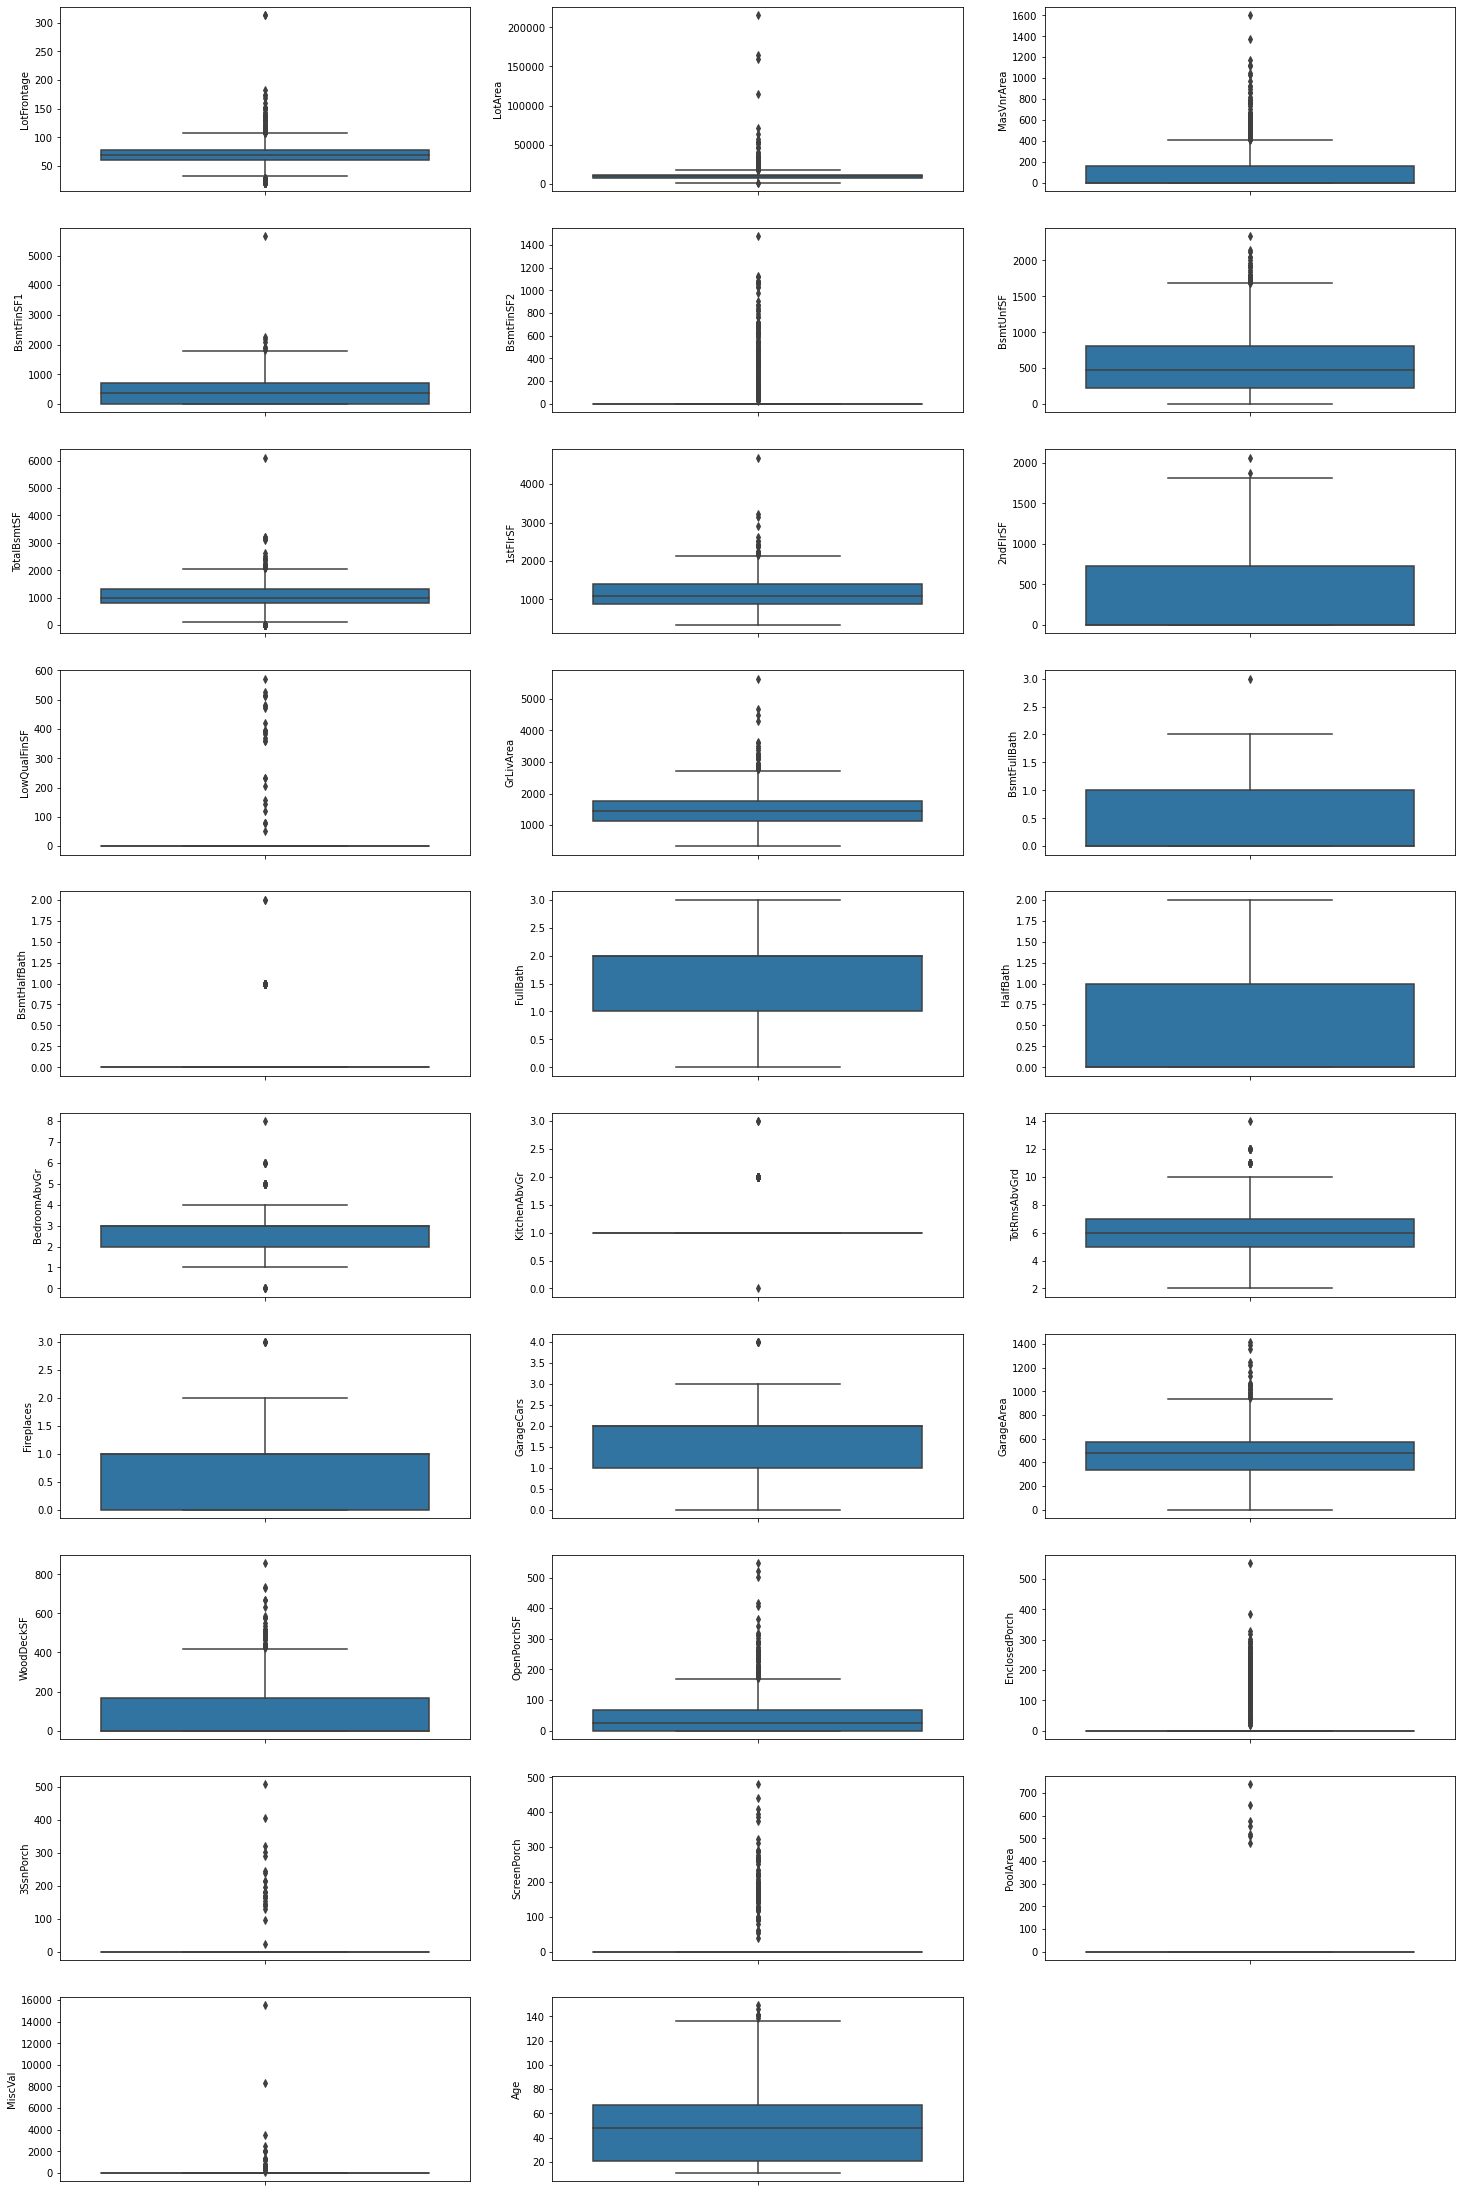

In [117]:
# Plotting the boxplot to observe the outliers, if any.
plt.figure(figsize = (25,40))
num_cols = ['LotFrontage','LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 
            '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
            'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
            'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'Age']
for i in enumerate(num_cols):
    plt.subplot(10,3,i[0]+1)
    sns.boxplot(df[i[1]], orient='v')

It is observed that lot of numerical columns contains outliers. So for handling those ouliers we are performing log transformation on that features.

In [118]:
# Using capping on those variables which contain outliers
n_cols = ['LotFrontage','LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'Age']
for i in n_cols:
    q1 = df[i].quantile(0.05)
    q2 = df[i].quantile(0.95)
    df[i][df[i]<=q1] = q1
    df[i][df[i]>=q2] = q2

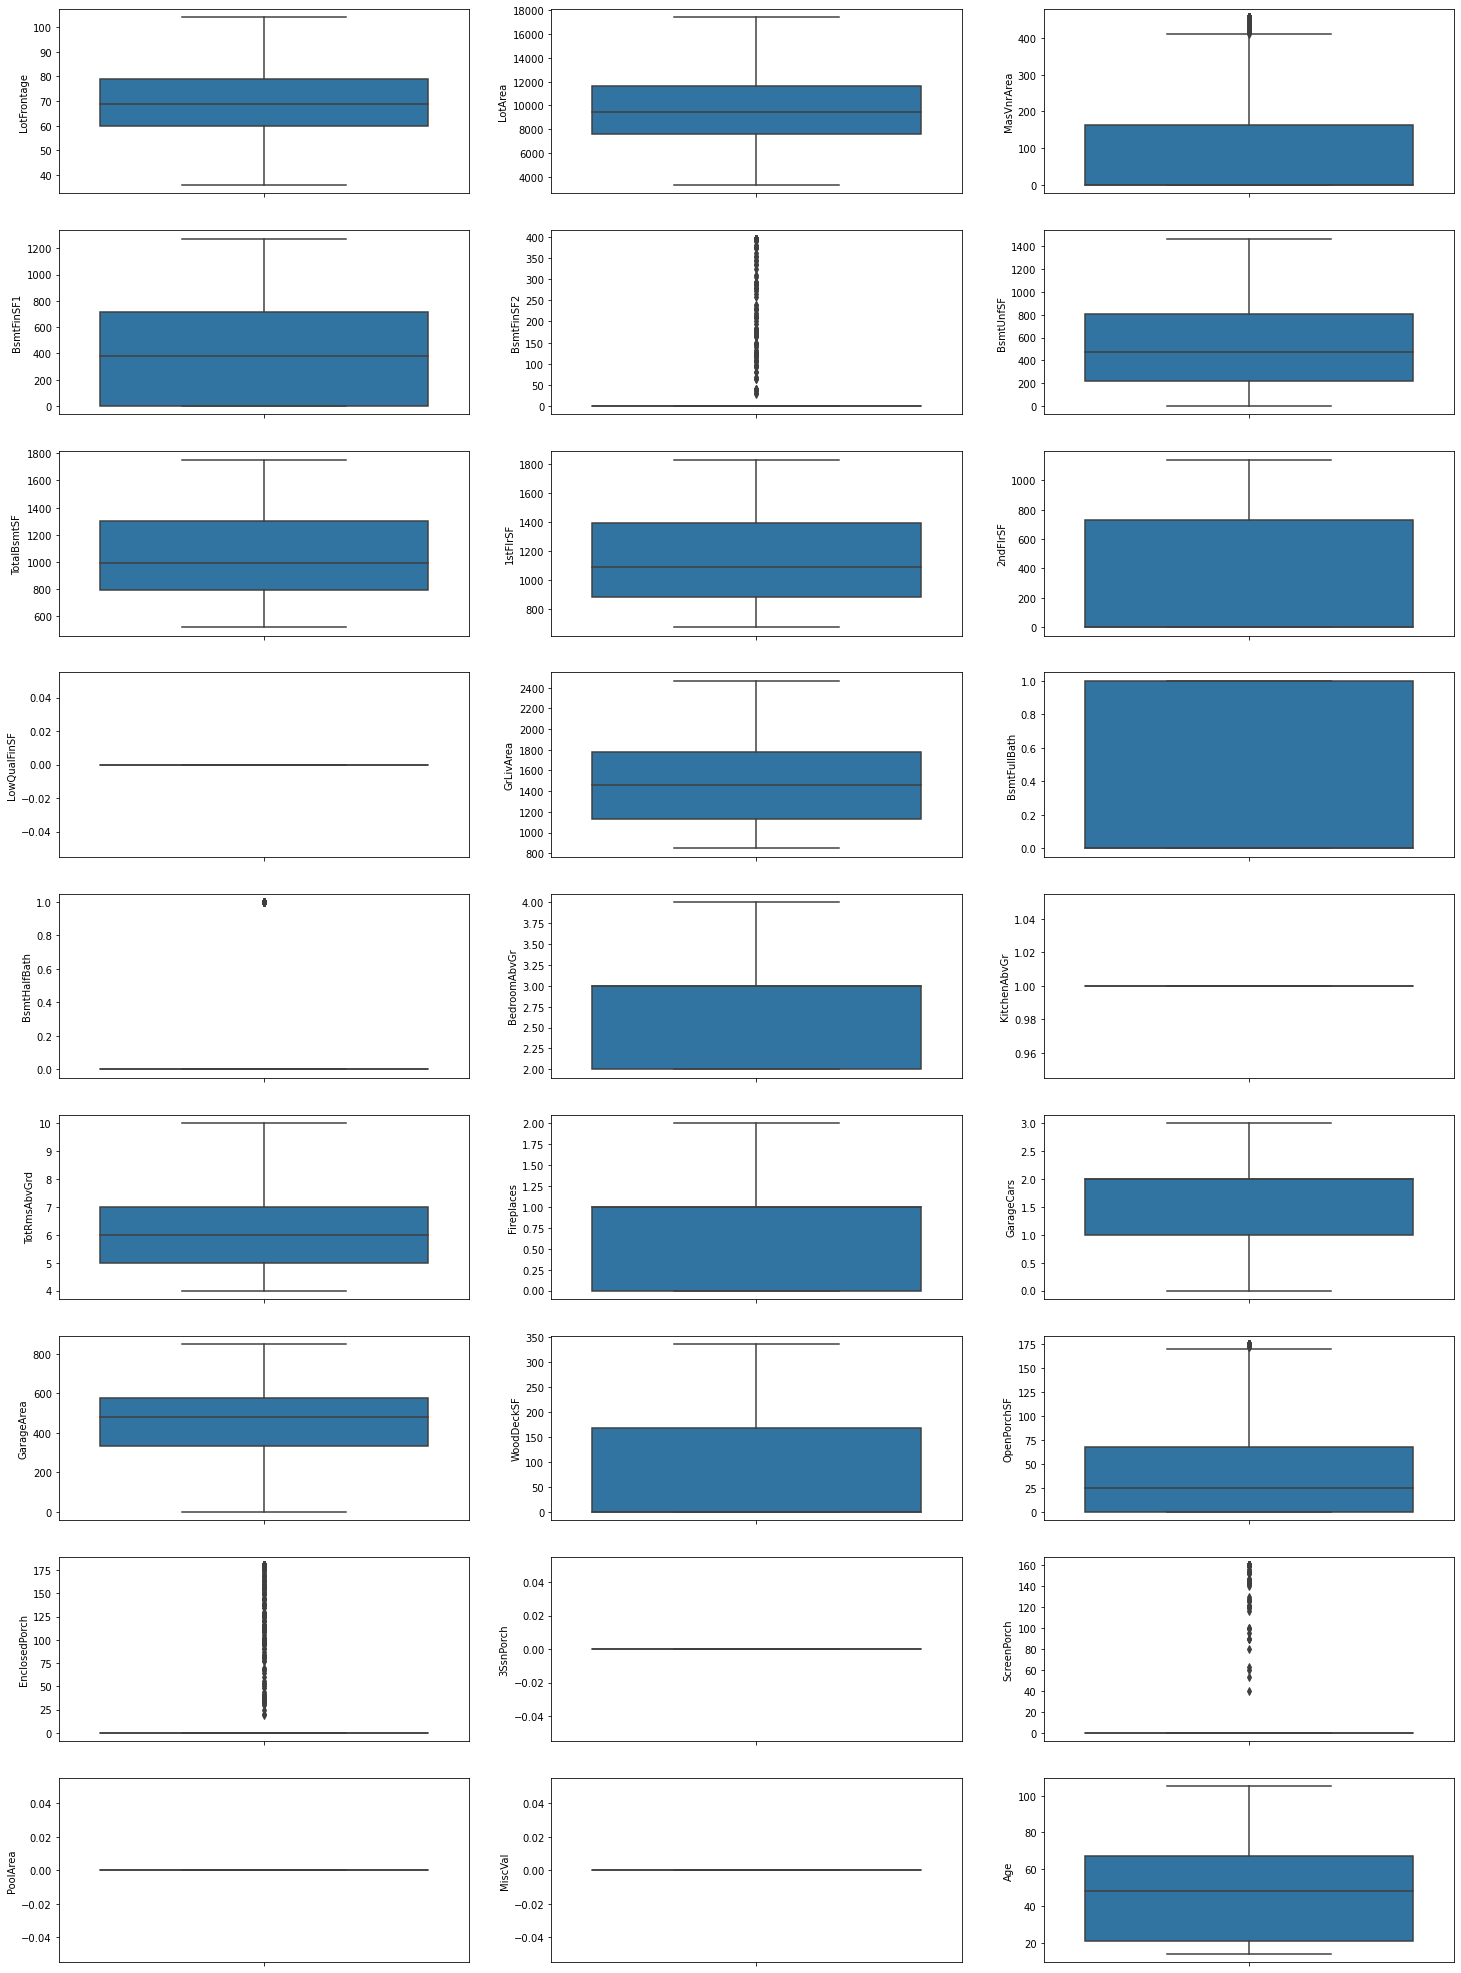

In [119]:
# Plotting the boxblot
plt.figure(figsize = (25,40))
for i in enumerate(n_cols):
    plt.subplot(10,3,i[0]+1)
    sns.boxplot(df[i[1]], orient='v')

After performing capping to deal with outliers, we observe that few variables still contain outliers. But we will not perform futher capping on those variables beacuse it may result in information loss. So taking this data to carry on further operations

### Univariate Analysis - Categorical Variables

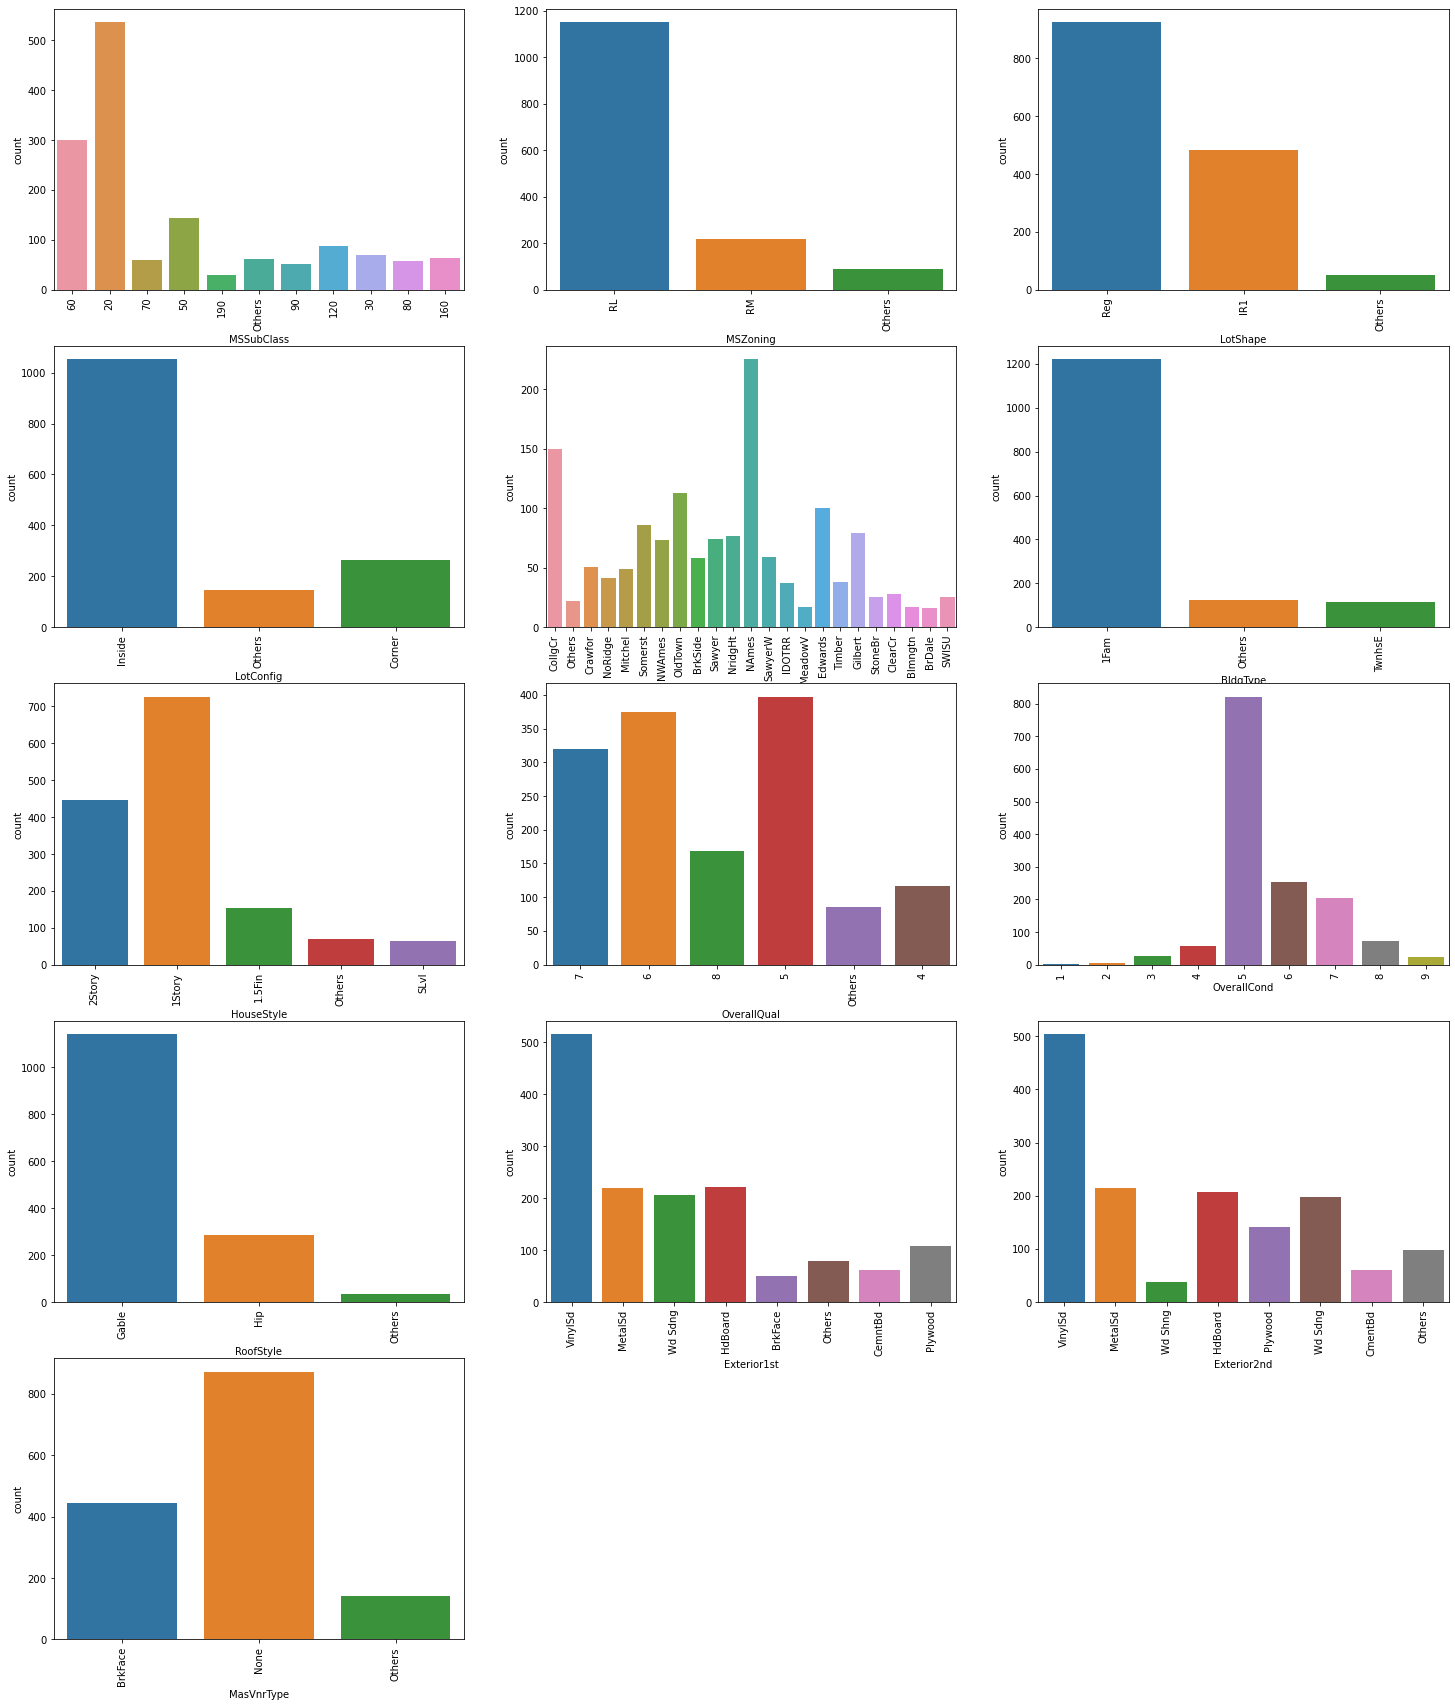

In [120]:
cat_cols1 = ['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 
             'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType']
plt.figure(figsize = (25,30))
for i in enumerate(cat_cols1):
    plt.subplot(5,3,i[0]+1)
    sns.countplot(df[i[1]])
    plt.xticks(rotation=90)

#### From the above plot following points are observed:
    1) Most of the houses are in the Residential Low Density Zone
    2) Most of the property are of regular shape
    3) Configuration of most of the lots are Inside
    4) Most of the property are neighbouring to North Ames
    5) Maximum Type of dwelling is Single-family Detached
    6) Most of the houses are 1 storied
    7) Condition of most of the houses are Average with roofing style as Gable
    8) Exterior covering of most of the houses are with Vinyl Siding
    9) The type of dwelling of most of the properties is 1-STORY 1946 & NEWER ALL STYLES followed by 2-STORY 1946 & NEWER

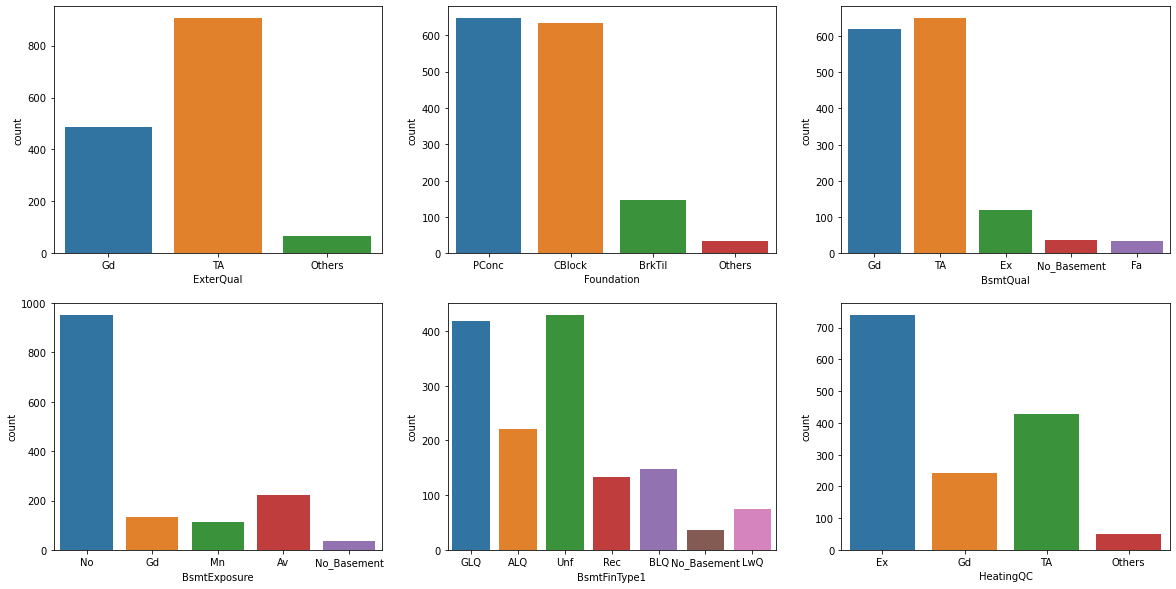

In [121]:
cat_cols2 = ['ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure','BsmtFinType1', 'HeatingQC']
plt.figure(figsize = (20,10))
for i in enumerate(cat_cols2):
    plt.subplot(2,3,i[0]+1)
    sns.countplot(df[i[1]])

#### From the above plot following points are observed:
    1) The exterior of most of the houses are Average/Typical
    2) Foundation of most of the houses are Poured Contrete and Cinder Block
    3) The height of the basement of most of the houses are in the range of 80-99 inches
    4) Most of the basement finished area are either Unfinshed or Good Living Quarters
    5) Heating quality and condition of most of the houses are excellent

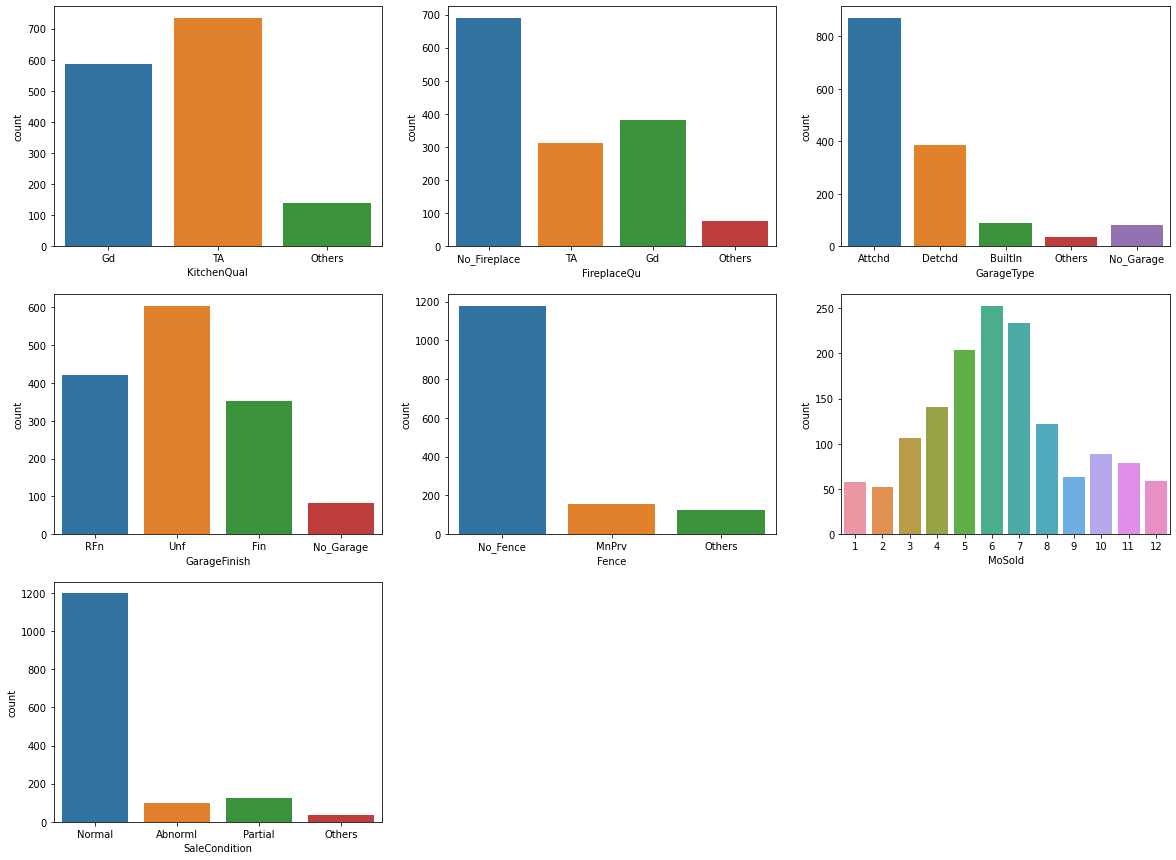

In [122]:
cat_cols3 = ['KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'Fence', 'MoSold', 'SaleCondition']
plt.figure(figsize = (20,15))
for i in enumerate(cat_cols3):
    plt.subplot(3,3,i[0]+1)
    sns.countplot(df[i[1]])

#### From the above plot following points are observed:
    1) The quality of most of the properties are either Average or Good
    2) Most of the properties didn't have Fireplace.
    3) The garage of most of the houses are attached to the home but are unfinished.
    4) Most of the properties didn't have Fence
    5) The sale of most of the properties were normal and were mainly done in the month of may, June and July.

### Univariate Analysis - Continous variables

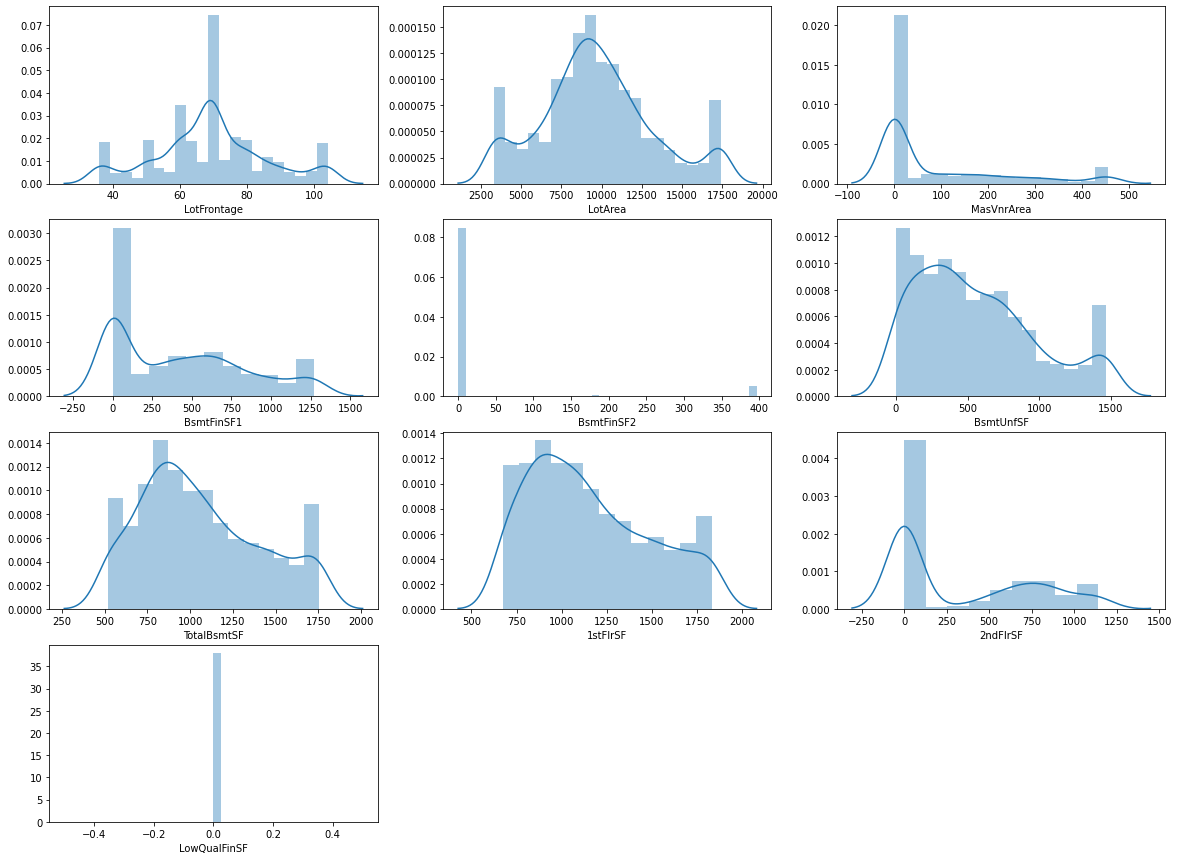

In [123]:
num_cols1 = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
             'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF']
plt.figure(figsize = (20,15))
for i in enumerate(num_cols1):
    plt.subplot(4,3,i[0]+1)
    sns.distplot(df[i[1]])

It is observed that 'LotFrontage' and 'LotArea' almost follow a similar pattern. 'BsmtUnfSF', 'TotalBsmtSF' and '1stFlrSF' almost follow similar pattern. 'MasVnrArea' and '2ndFlrSF' are highly left skewed.
It is observed that lot size of most of the property are 10,000 sq.ft and the connected street of most of the property are around 70ft. Total square feet of basement area and First Floor square feet of most of the properties is around 900sq.ft adn Unfinished square feet of basement area is around 400sq.ft.

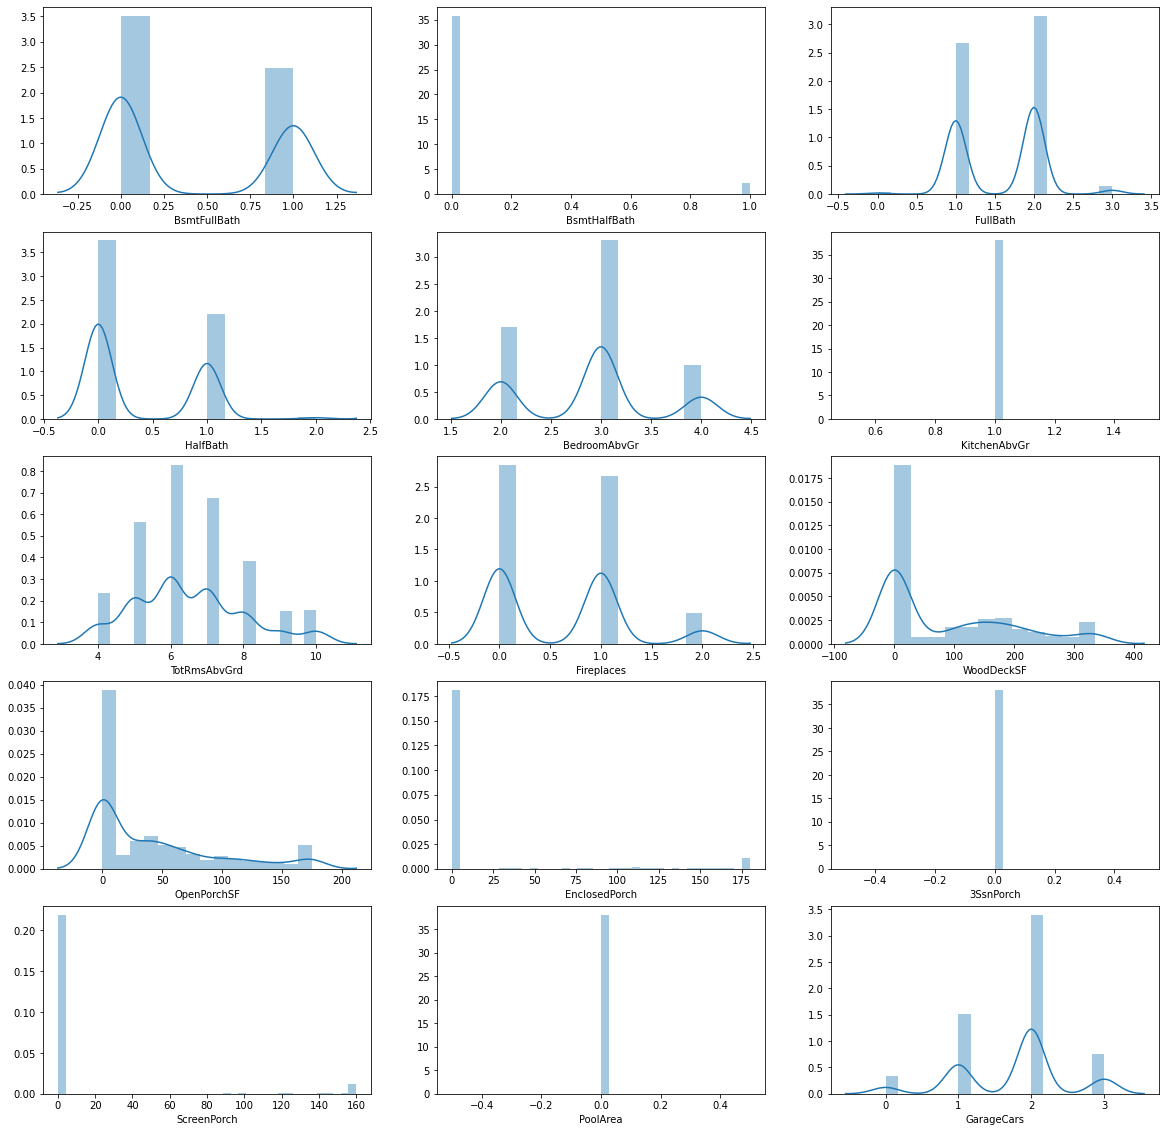

In [124]:
num_cols2 = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 
             'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'GarageCars']
plt.figure(figsize = (20,20))
for i in enumerate(num_cols2):
    plt.subplot(5,3,i[0]+1)
    sns.distplot(df[i[1]])

#### From the above plot it is observed that:
    1) The basement of most of the properties either has no full bathroom or has only 1
    2) Most of the properties has 1 or 2 full bathrooms above grade and lesser half bathrooms.
    3) Most of the properties has either has 3 or 2 bedrooms and total rooms of 5-7
    4) Most of the properties either has no fireplace or only 1.
    5) Most of the properties has no or lesser wood deck area, Open porch area, Enclosed porch area, Three season porch area, Screen porch area and pool area.
    6) The Garage capacity of most of houses are 2.

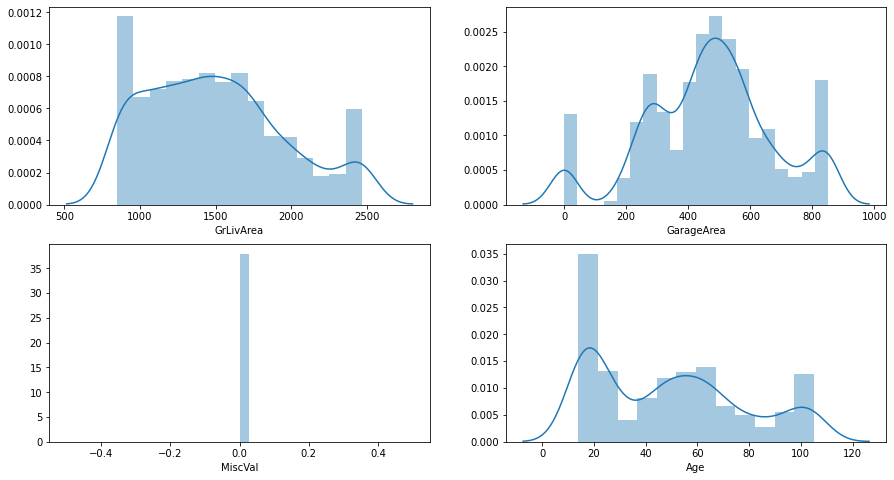

In [125]:
num_cols3 = ['GrLivArea', 'GarageArea', 'MiscVal', 'Age']
plt.figure(figsize = (15,8))
for i in enumerate(num_cols3):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(df[i[1]])

#### It is observed from above graph that:
    1) Ground living area square feet of most of the properties are in the range of 1000-1600sq.ft
    2) The garage area of most of the properties are around 500 sq.ft.
    3) The age of most of the properties are around 20 years and the 2nd most if 60 years.

### Bivariate Analysis - Categorical vs Categorical Variables

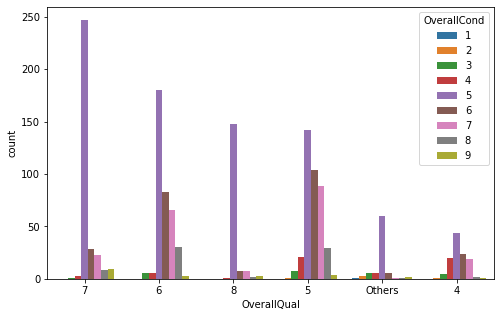

In [126]:
# Comparing 'OverallQual' with 'OverallCond'
plt.figure(figsize = (8,5))
sns.countplot(x='OverallQual', hue='OverallCond', data=df)
plt.show()

It is observed that the overall material and finish of most of the properties are average and higher and the overall condition of most of the properties across each quality is mainly above average. We may conclude that most of the properties, w.r.t overall material and finish and quality is average and above.

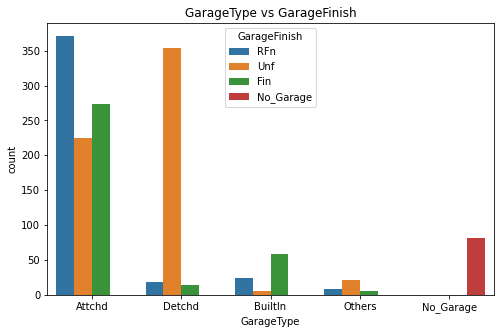

In [127]:
# Comparing 'GarageType' with 'GarageFinish'
plt.figure(figsize = (8,5))
sns.countplot(x='GarageType', hue='GarageFinish', data=df)
plt.title('GarageType vs GarageFinish')
plt.show()

It is observed that properties whose garage is attached to home are mainly Rough Finished or Finished and those whose garage is Detached from home are Unfinished.

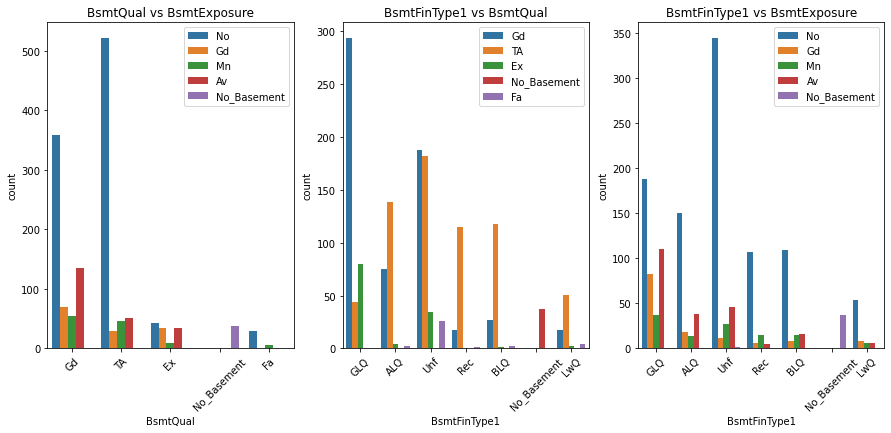

In [128]:
# Comparing among 'BsmtQual', 'BsmtExposure' and 'BsmtFinType1'
plt.figure(figsize = (15,6))
plt.subplot(1,3,1)
sns.countplot(x='BsmtQual', hue='BsmtExposure', data=df)
plt.title('BsmtQual vs BsmtExposure')
plt.xticks(rotation=45)
plt.legend(loc=1)

plt.subplot(1,3,2)
sns.countplot(x='BsmtFinType1', hue='BsmtQual', data=df)
plt.title('BsmtFinType1 vs BsmtQual')
plt.xticks(rotation=45)
plt.legend(loc=1)

plt.subplot(1,3,3)
sns.countplot(x='BsmtFinType1', hue='BsmtExposure', data=df)
plt.title('BsmtFinType1 vs BsmtExposure')
plt.xticks(rotation=45)
plt.legend(loc=1)
plt.show()

It is observed that most of the properties has a typical basement height in the range of 80-99 inches but has no exposure. It is observed that Good Living Quarters mainly has a basement height in the range of 90-99 inches. Also observed that basement of most of the properties has no exposure.

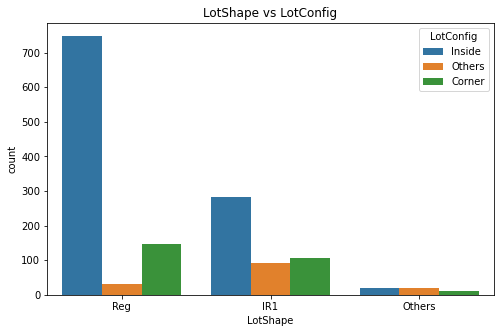

In [129]:
# Comparing 'LotShape' with 'LotConfig'
plt.figure(figsize = (8,5))
sns.countplot(x='LotShape', hue='LotConfig', data=df)
plt.title('LotShape vs LotConfig')
plt.show()

It is observed that General shape of most of the properties are Regular and has an inside configuration

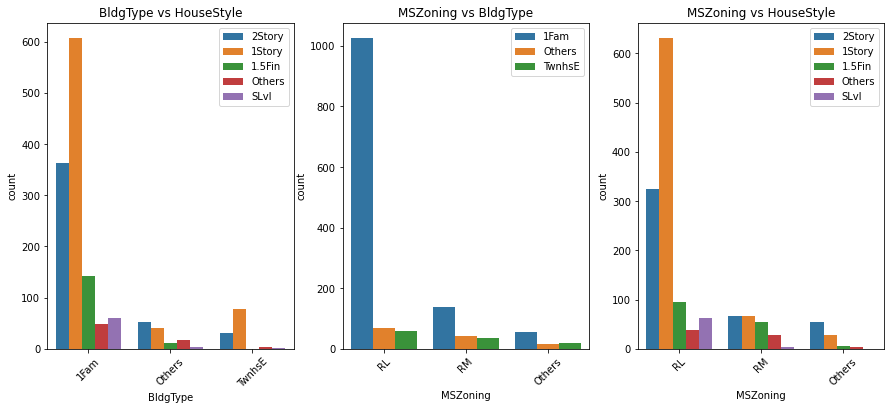

In [130]:
# Comparing among 'MSZoning', 'BldgType' and 'HouseStyle'
plt.figure(figsize = (15,6))
plt.subplot(1,3,1)
sns.countplot(x='BldgType', hue='HouseStyle', data=df)
plt.title('BldgType vs HouseStyle')
plt.xticks(rotation=45)
plt.legend(loc=1)

plt.subplot(1,3,2)
sns.countplot(x='MSZoning', hue='BldgType', data=df)
plt.title('MSZoning vs BldgType')
plt.xticks(rotation=45)
plt.legend(loc=1)

plt.subplot(1,3,3)
sns.countplot(x='MSZoning', hue='HouseStyle', data=df)
plt.title('MSZoning vs HouseStyle')
plt.xticks(rotation=45)
plt.legend(loc=1)
plt.show()

Most of the properties are one storied Single-family Detached and are lying in Residential Low Density zone.

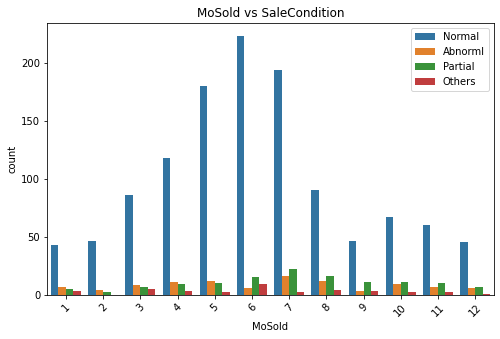

In [131]:
# Comparing 'MoSold' and 'SaleCondition'
plt.figure(figsize = (8,5))
sns.countplot(x='MoSold', hue='SaleCondition', data=df)
plt.title('MoSold vs SaleCondition')
plt.xticks(rotation=45)
plt.legend(loc=1)

plt.show()

Most of the sale of the properties are regular and are happened mostly in the month of May, June and July

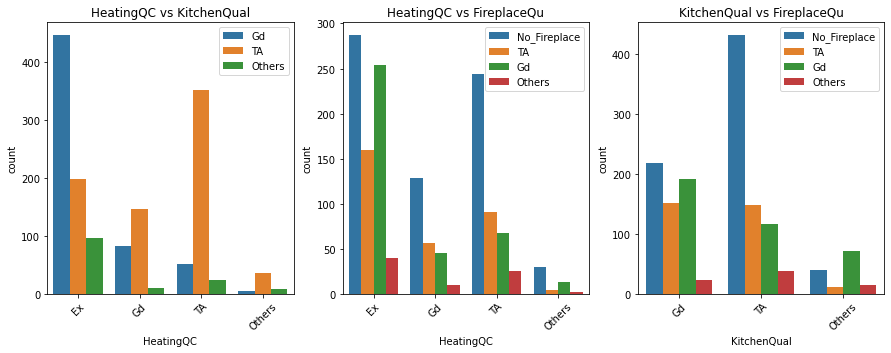

In [132]:
# Comparing 'HeatingQC', 'KitchenQual' and 'FireplaceQu'
plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
sns.countplot(x='HeatingQC', hue='KitchenQual', data=df)
plt.title('HeatingQC vs KitchenQual')
plt.xticks(rotation=45)
plt.legend(loc=1)

plt.subplot(1,3,2)
sns.countplot(x='HeatingQC', hue='FireplaceQu', data=df)
plt.title('HeatingQC vs FireplaceQu')
plt.xticks(rotation=45)
plt.legend(loc=1)

plt.subplot(1,3,3)
sns.countplot(x='KitchenQual', hue='FireplaceQu', data=df)
plt.title('KitchenQual vs FireplaceQu')
plt.xticks(rotation=45)
plt.legend(loc=1)
plt.show()

Those properties which has an Excellent Heating Quality has Good Kitchen Quality and no fireplace. But those have fireplace are or good quality.Those properties having Average Heating Quality has average Kitchen quality and No fireplace. It is also observed that properties whose kitchen are of average qualtiy has no fireplace.

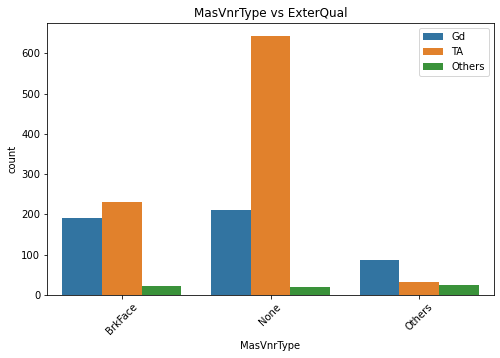

In [133]:
# Comparing 'MasVnrType' and 'ExterQual'
plt.figure(figsize = (8,5))
sns.countplot(x='MasVnrType', hue='ExterQual', data=df)
plt.title('MasVnrType vs ExterQual')
plt.xticks(rotation=45)
plt.legend(loc=1)

plt.show()

Properties which has no Masonry veneer has an average quality of the material on the exterior

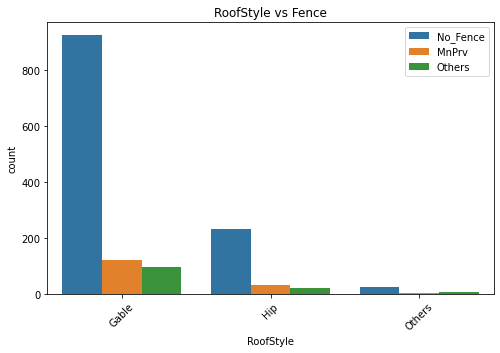

In [134]:
# Comparing 'RoofStyle' and 'Fence'
plt.figure(figsize = (8,5))
sns.countplot(x='RoofStyle', hue='Fence', data=df)
plt.title('RoofStyle vs Fence')
plt.xticks(rotation=45)
plt.legend(loc=1)

plt.show()

Most of the properties has Gable type of roof with no fence

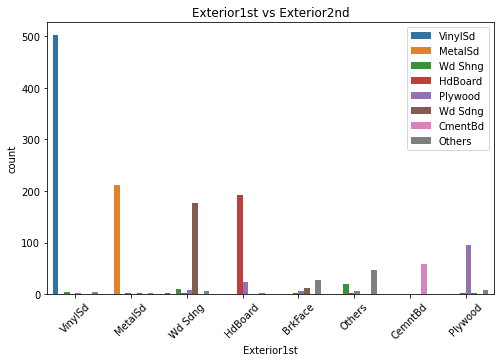

In [135]:
# Comparing 'Exterior1st' and 'Exterior2nd'
plt.figure(figsize = (8,5))
sns.countplot(x='Exterior1st', hue='Exterior2nd', data=df)
plt.title('Exterior1st vs Exterior2nd')
plt.xticks(rotation=45)
plt.legend(loc=1)

plt.show()

Exterior covering of most of the properties are done with Vinyl Siding

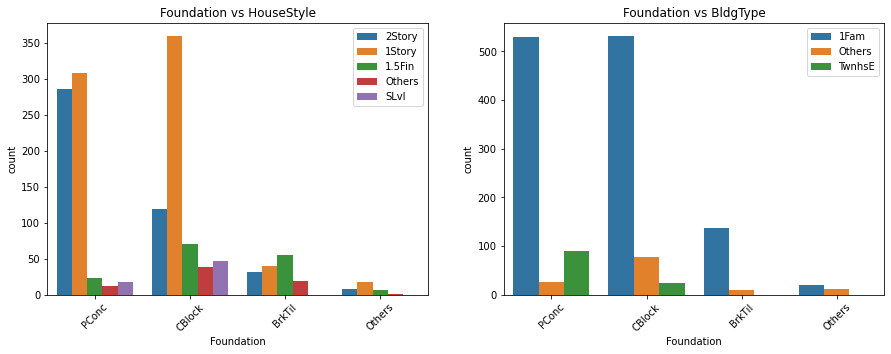

In [136]:
# Comparing'Foundation' with 'BldgType' and 'HouseStyle'
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.countplot(x='Foundation', hue='HouseStyle', data=df)
plt.title('Foundation vs HouseStyle')
plt.xticks(rotation=45)
plt.legend(loc=1)

plt.subplot(1,2,2)
sns.countplot(x='Foundation', hue='BldgType', data=df)
plt.title('Foundation vs BldgType')
plt.xticks(rotation=45)
plt.legend(loc=1)

plt.show()

Foundation of most of the 1 storied and 2 storied properties Single-family Detached properties are done with either Cinder Block or Poured Contrete

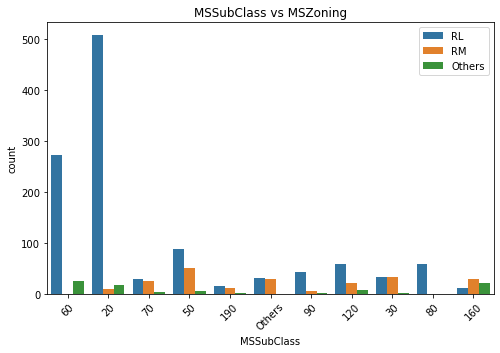

In [137]:
# Comparing 'MSSubClass' and 'MSZoning'
plt.figure(figsize = (8,5))
sns.countplot(x='MSSubClass', hue='MSZoning', data=df)
plt.title('MSSubClass vs MSZoning')
plt.xticks(rotation=45)
plt.legend(loc=1)

plt.show()

Most of the properties with dwelling type of 1-STORY 1946 & NEWER ALL STYLES are in Residential Low Density Zone

### Bivariate Analysis - Categorical vs Continous Variable

In [138]:
# Adding the 'SalePrice' target variable to num_cols
num_cols = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'Age']

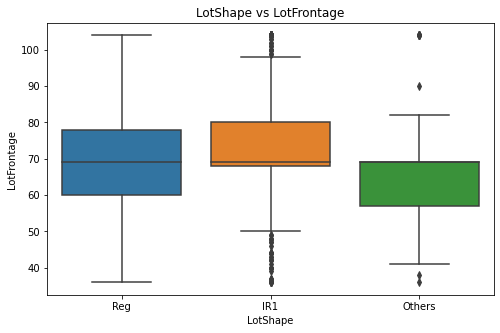

In [139]:
# Comparing 'LotShape' with 'LotFrontage'
plt.figure(figsize=(8,5))
sns.boxplot(df['LotShape'], df['LotFrontage'])
plt.title('LotShape vs LotFrontage')
plt.show()

The median value of Linear feet of connected street is almost same for both Regular and Slightly irregular shape of property

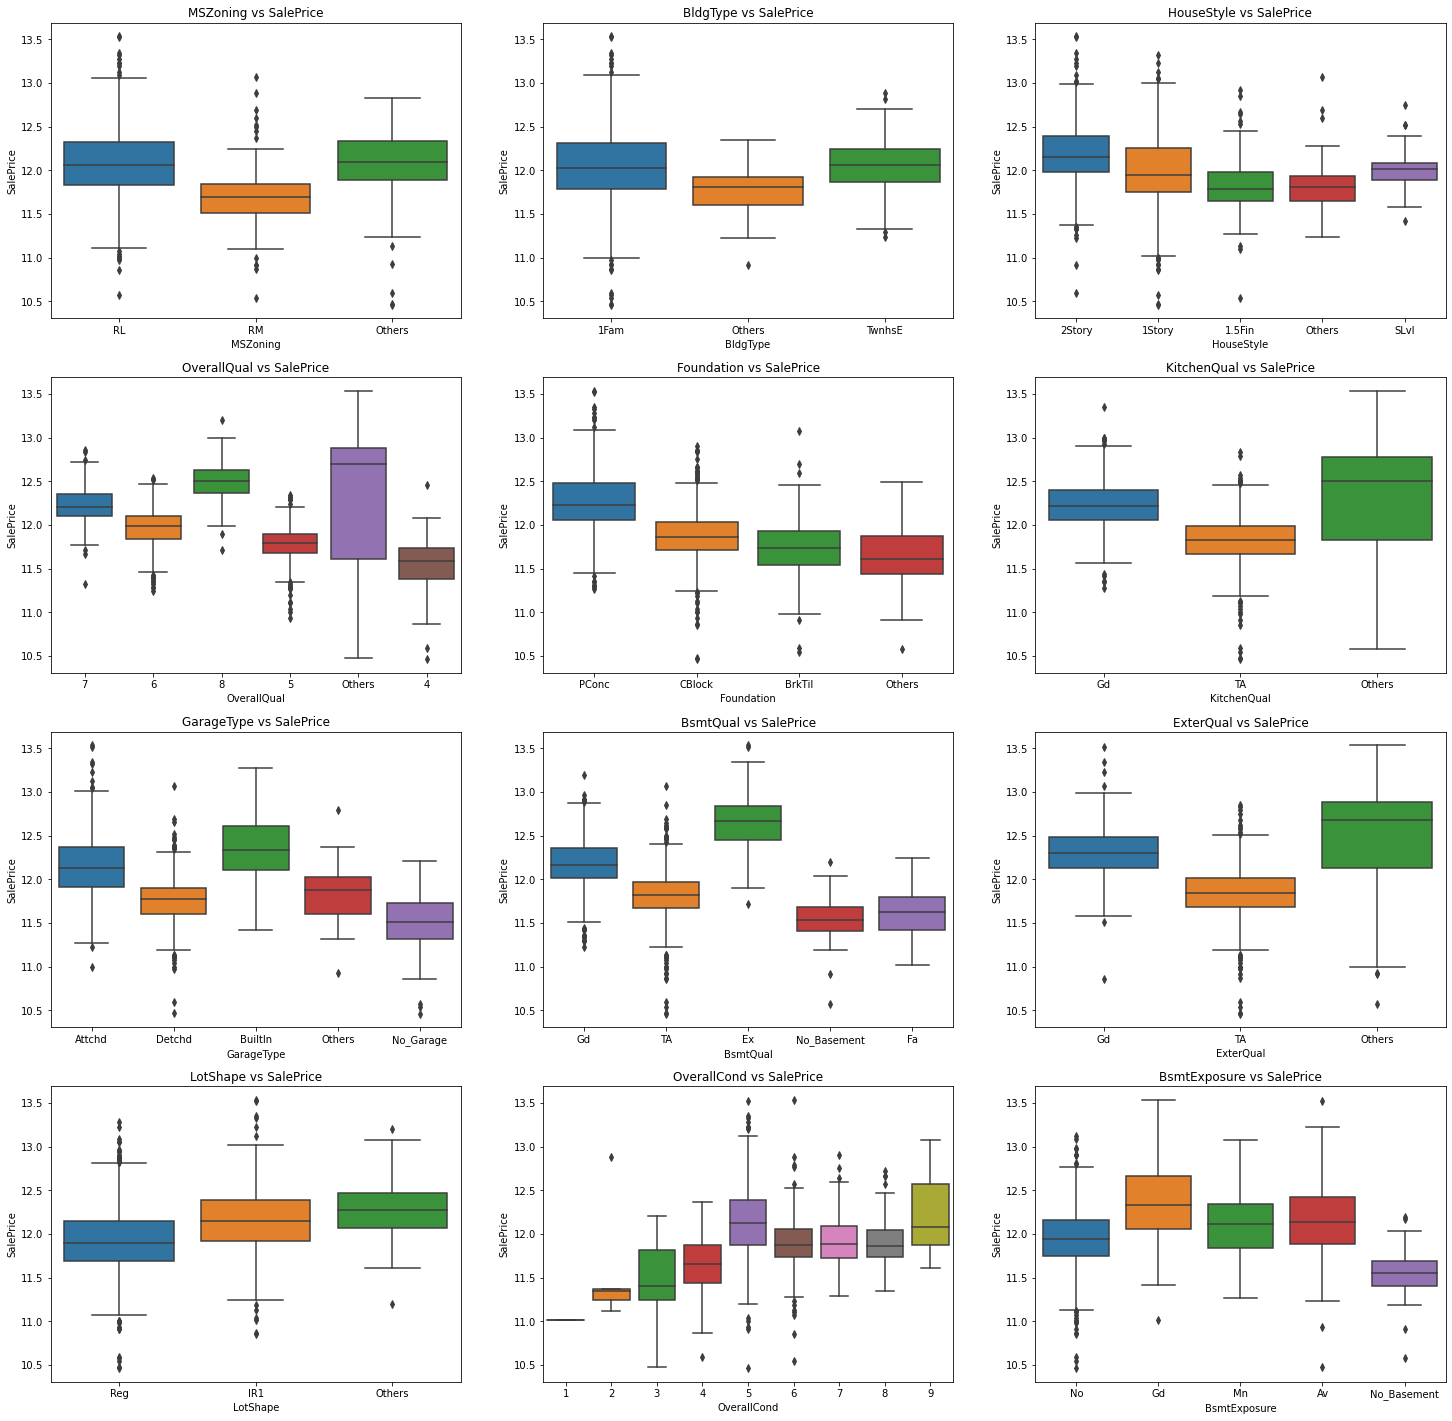

In [140]:
# Comparing the target variable 'SalePrice' with various other categorical independent features
cols = ['MSZoning', 'BldgType', 'HouseStyle', 'OverallQual', 'Foundation', 'KitchenQual', 'GarageType', 'BsmtQual', 'ExterQual', 'LotShape', 'OverallCond', 'BsmtExposure']
plt.figure(figsize = (25,25))
for i in enumerate(cols):
    plt.subplot(4,3,i[0]+1)
    sns.boxplot(df[i[1]], df['SalePrice'])
    plt.title(i[1] + ' vs SalePrice')

#### From the above plot below mention points are being observed:
    1) The median sale price of properties which belongs to Residential Low Density and Others Zone are almost similar. It is also same for those properties whose type of dwelling is Single-family Detached and Townhouse End Unit
    2) 2 storied properties and properties with foundation of Poured Contrete are priced higher.
    3) It is also observed that properties with garage type as Built-In (Garage part of house - typically has room above garage) and basement greater than 100 inches are priced higher
    4) It is observed that properties whose overall condition is excellent and has a good exposure of basement is priced higher

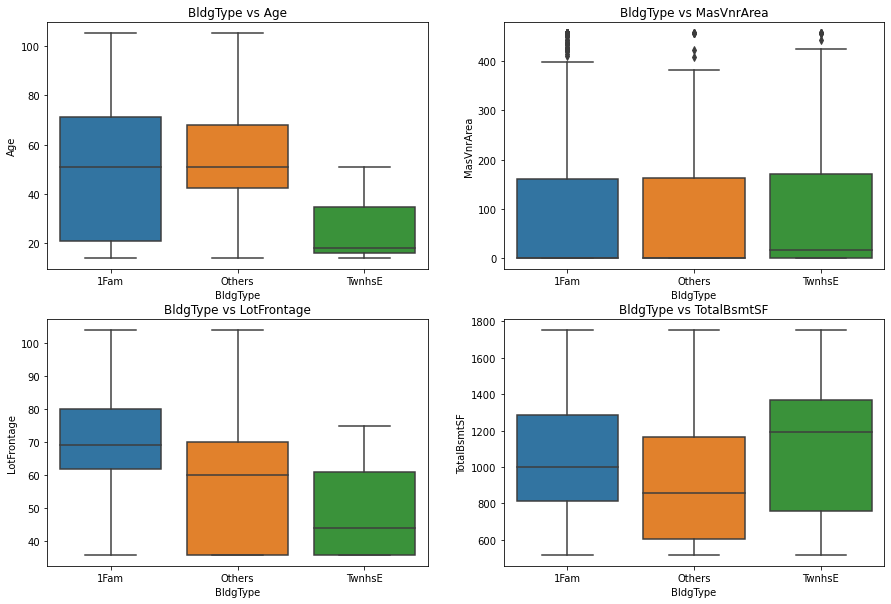

In [141]:
# Comparing 'BldgType' with 'Age', 'MasVnrArea' and 'LotFrontage'
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
sns.boxplot(df['BldgType'], df['Age'])
plt.title('BldgType vs Age')

plt.subplot(2,2,2)
sns.boxplot(df['BldgType'], df['MasVnrArea'])
plt.title('BldgType vs MasVnrArea')

plt.subplot(2,2,3)
sns.boxplot(df['BldgType'], df['LotFrontage'])
plt.title('BldgType vs LotFrontage')

plt.subplot(2,2,4)
sns.boxplot(df['BldgType'], df['TotalBsmtSF'])
plt.title('BldgType vs TotalBsmtSF')

plt.show()

The median age of properties whose type of dwelling is Single-family Detached and Others are alsmost similar. Townhouse End Unit properties has higher median of Masonry veneer area among others and also has a higher total square feet of basement area. Single-family Detached properties has a higher Linear feet of street connected to property.

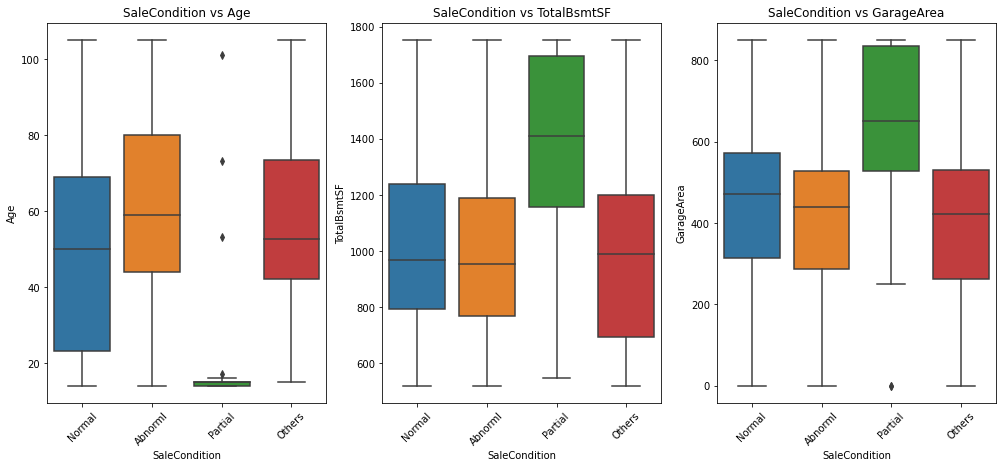

In [142]:
# Comparing 'SaleCondition' with 'Age', 'TotalBsmtSF' and 'GarageArea'
plt.figure(figsize = (17,7))
plt.subplot(1,3,1)
sns.boxplot(df['SaleCondition'], df['Age'])
plt.title('SaleCondition vs Age')
plt.xticks(rotation=45)

plt.subplot(1,3,2)
sns.boxplot(df['SaleCondition'], df['TotalBsmtSF'])
plt.title('SaleCondition vs TotalBsmtSF')
plt.xticks(rotation=45)

plt.subplot(1,3,3)
sns.boxplot(df['SaleCondition'], df['GarageArea'])
plt.title('SaleCondition vs GarageArea')
plt.xticks(rotation=45)

plt.show()

Properties with higher basement area and garage area were sold into partial condition. Most of the older houses were sold in abnormal conditions

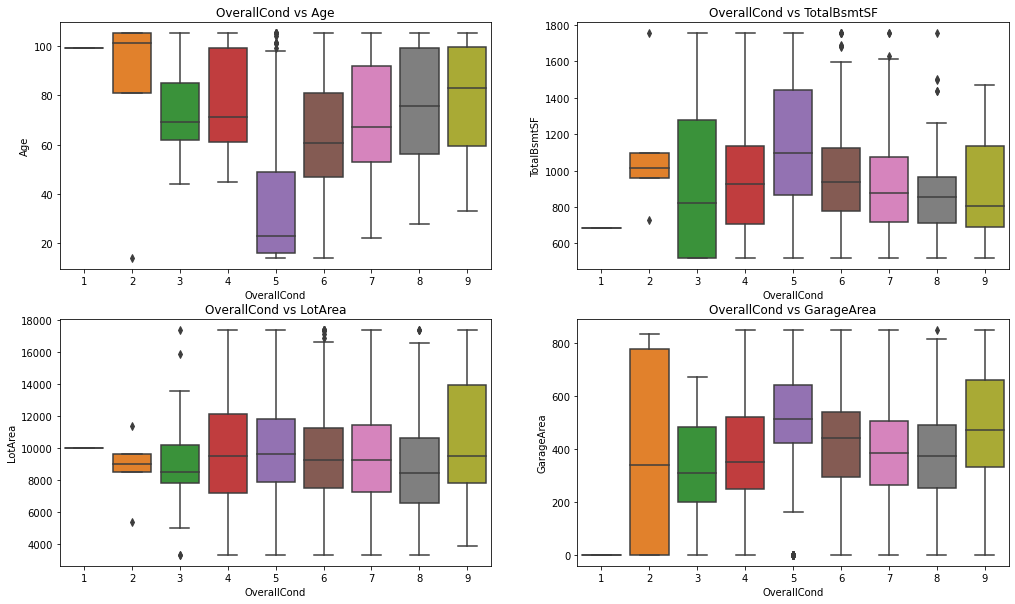

In [143]:
# Comparing 'OverallCond' with 'Age', 'TotalBsmtSF' and 'LotArea'
plt.figure(figsize = (17,10))
plt.subplot(2,2,1)
sns.boxplot(df['OverallCond'], df['Age'])
plt.title('OverallCond vs Age')

plt.subplot(2,2,2)
sns.boxplot(df['OverallCond'], df['TotalBsmtSF'])
plt.title('OverallCond vs TotalBsmtSF')

plt.subplot(2,2,3)
sns.boxplot(df['OverallCond'], df['LotArea'])
plt.title('OverallCond vs LotArea')

plt.subplot(2,2,4)
sns.boxplot(df['OverallCond'], df['GarageArea'])
plt.title('OverallCond vs GarageArea')

plt.show()

Properties whose overall condition is Average has a lower age and higher basement area. Properties whose overall condition is excellent has higher lot area. It is also observed that properties with higher garage area has a poor overall condition.

### Bivariate Analysis - Continous vs Continous Variable

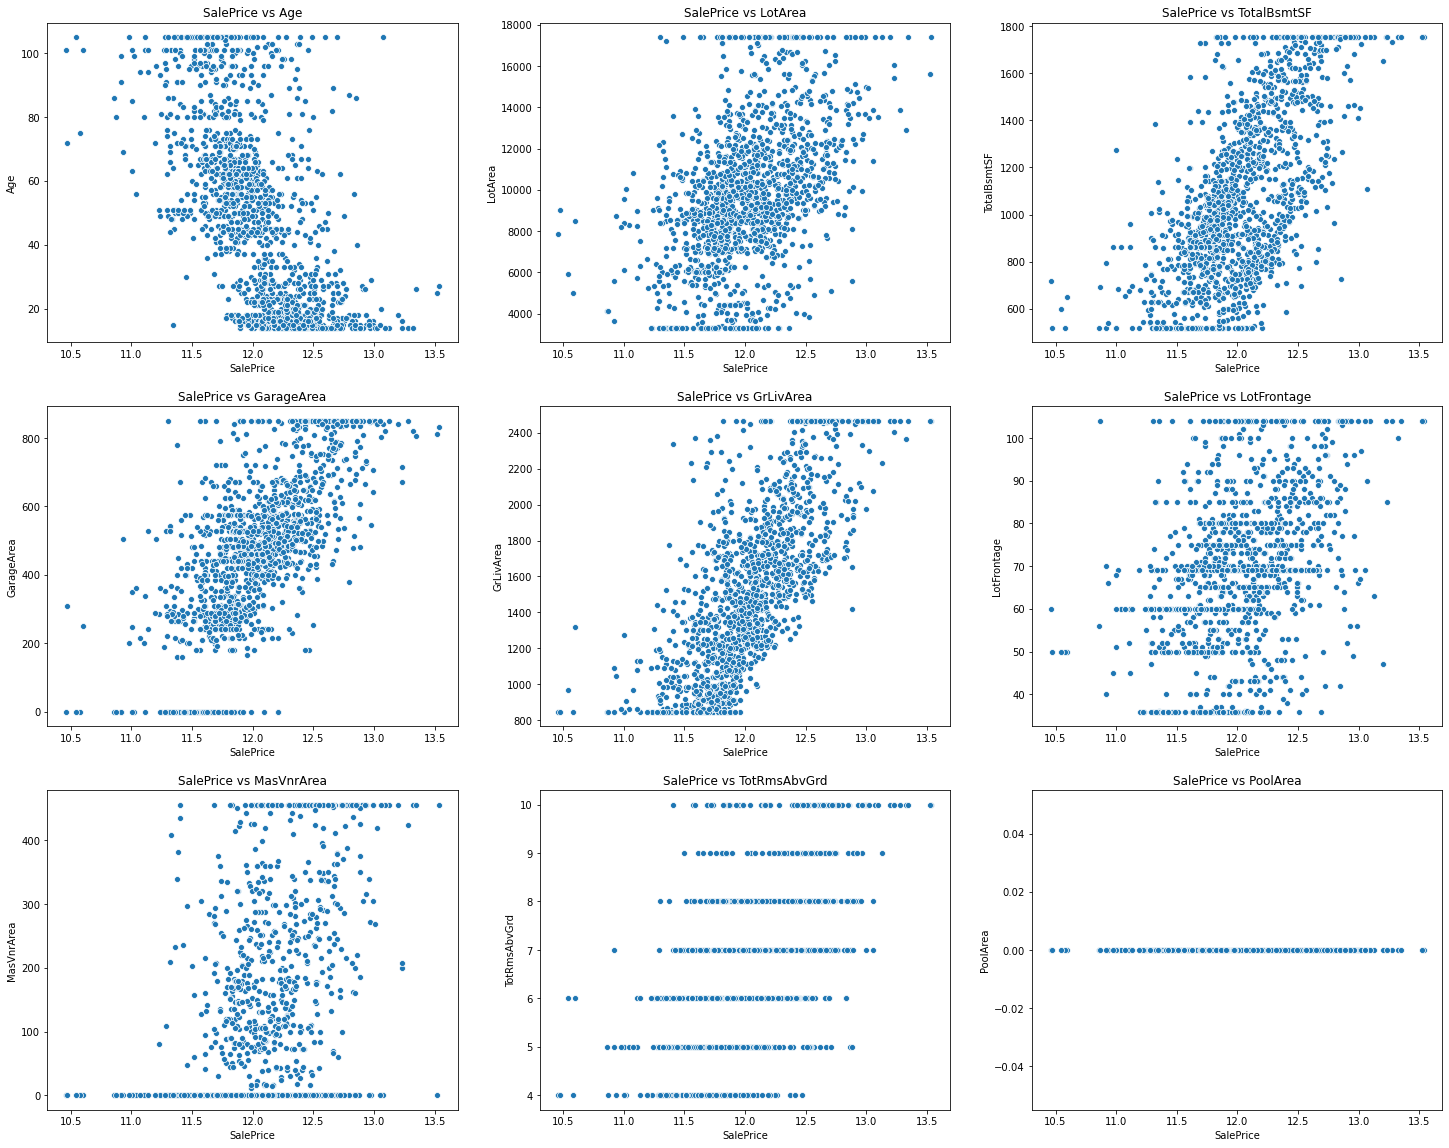

In [144]:
# Comparing the target variable 'SalePrice' with certain independent numerical features
c = ['Age', 'LotArea', 'TotalBsmtSF', 'GarageArea', 'GrLivArea', 'LotFrontage', 'MasVnrArea', 'TotRmsAbvGrd', 'PoolArea']
plt.figure(figsize=(25,20))
for i in enumerate(c):
    plt.subplot(3,3,i[0]+1)
    sns.scatterplot(df['SalePrice'], df[i[1]])
    plt.title('SalePrice vs ' + i[1])

#### From the above plot following points are observed:
    1) SalePrice and Age shows almost a negative linear relationship.
    2) SalePrice shows a positive linear relationship with Lot size, Basement Area, Garage area, total rooms above grade and above grade (ground) living area.
    3) SalePrice is almost randomly related with Linear feet of street connected to property and Masonry veneer area
    4) No such relationship is observed between SalePrice and Pool Area

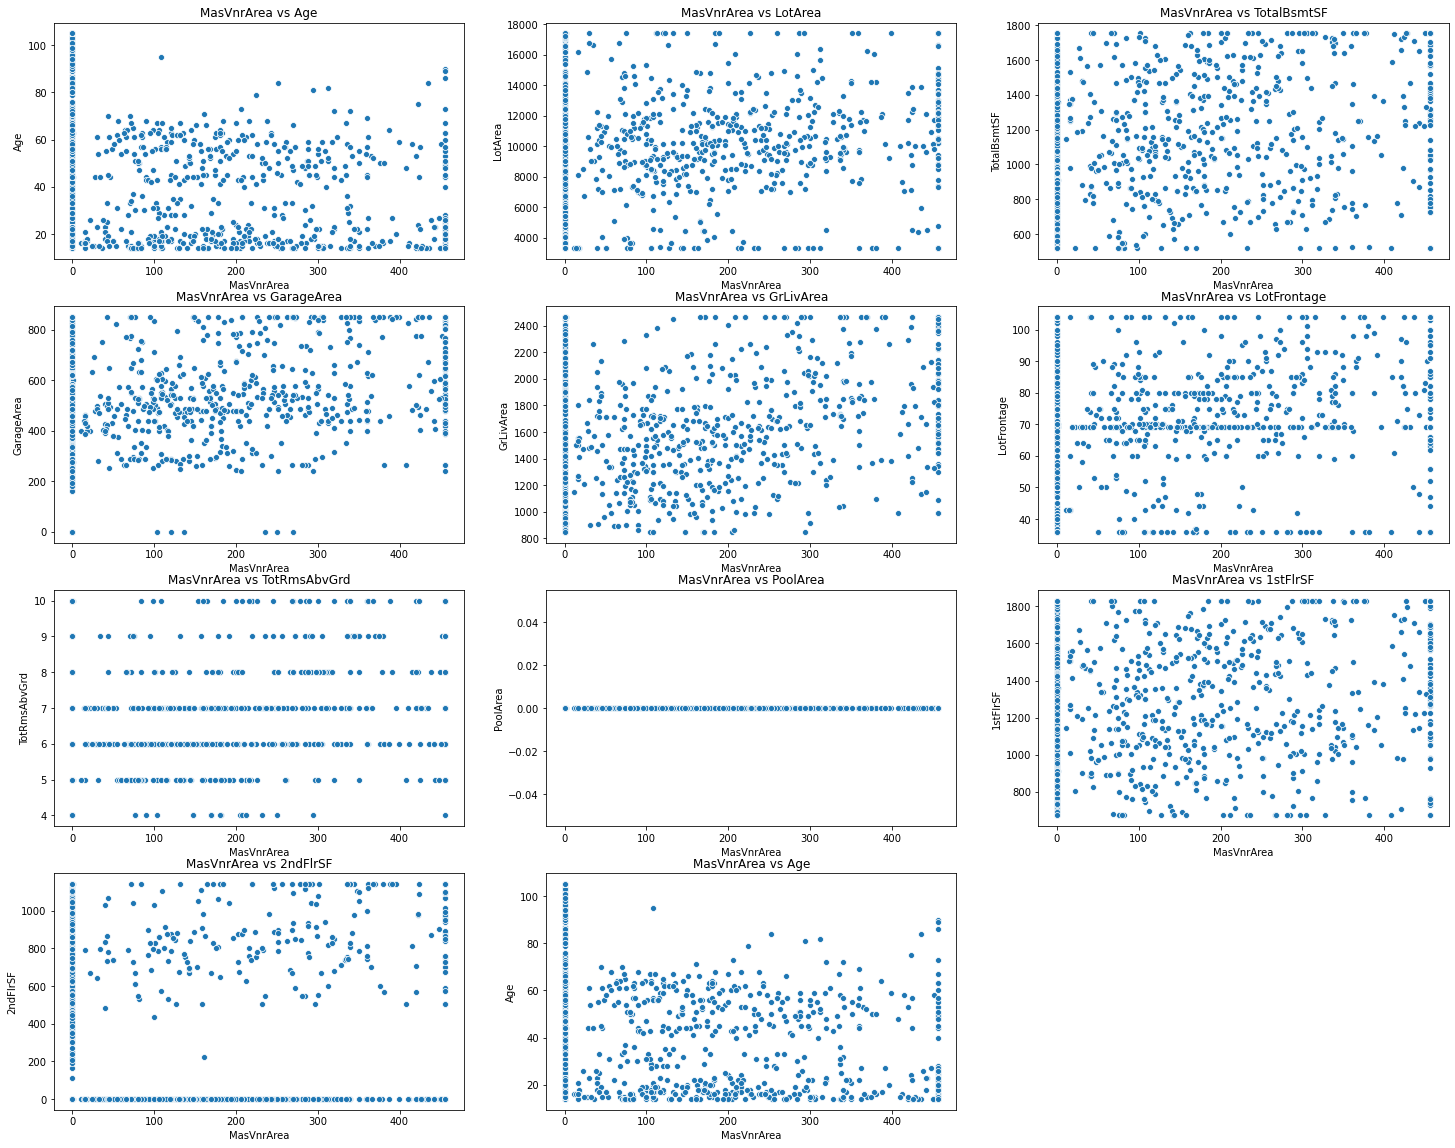

In [145]:
# Comparing 'MasVnrArea' with few numerical variables
c = ['Age', 'LotArea', 'TotalBsmtSF', 'GarageArea', 'GrLivArea', 'LotFrontage', 'TotRmsAbvGrd', 'PoolArea', '1stFlrSF', 
     '2ndFlrSF', 'Age']
plt.figure(figsize=(25,20))
for i in enumerate(c):
    plt.subplot(4,3,i[0]+1)
    sns.scatterplot(df['MasVnrArea'], df[i[1]])
    plt.title('MasVnrArea vs ' + i[1])

It is obsered that, except 'PoolArea', 'MasVnrArea' is almost randomly related with 'Age', 'LotArea', 'TotalBsmtSF', 'GarageArea', 'GrLivArea', 'LotFrontage', 'TotRmsAbvGrd', '1stFlrSF', '2ndFlrSF' and 'Age' variables.

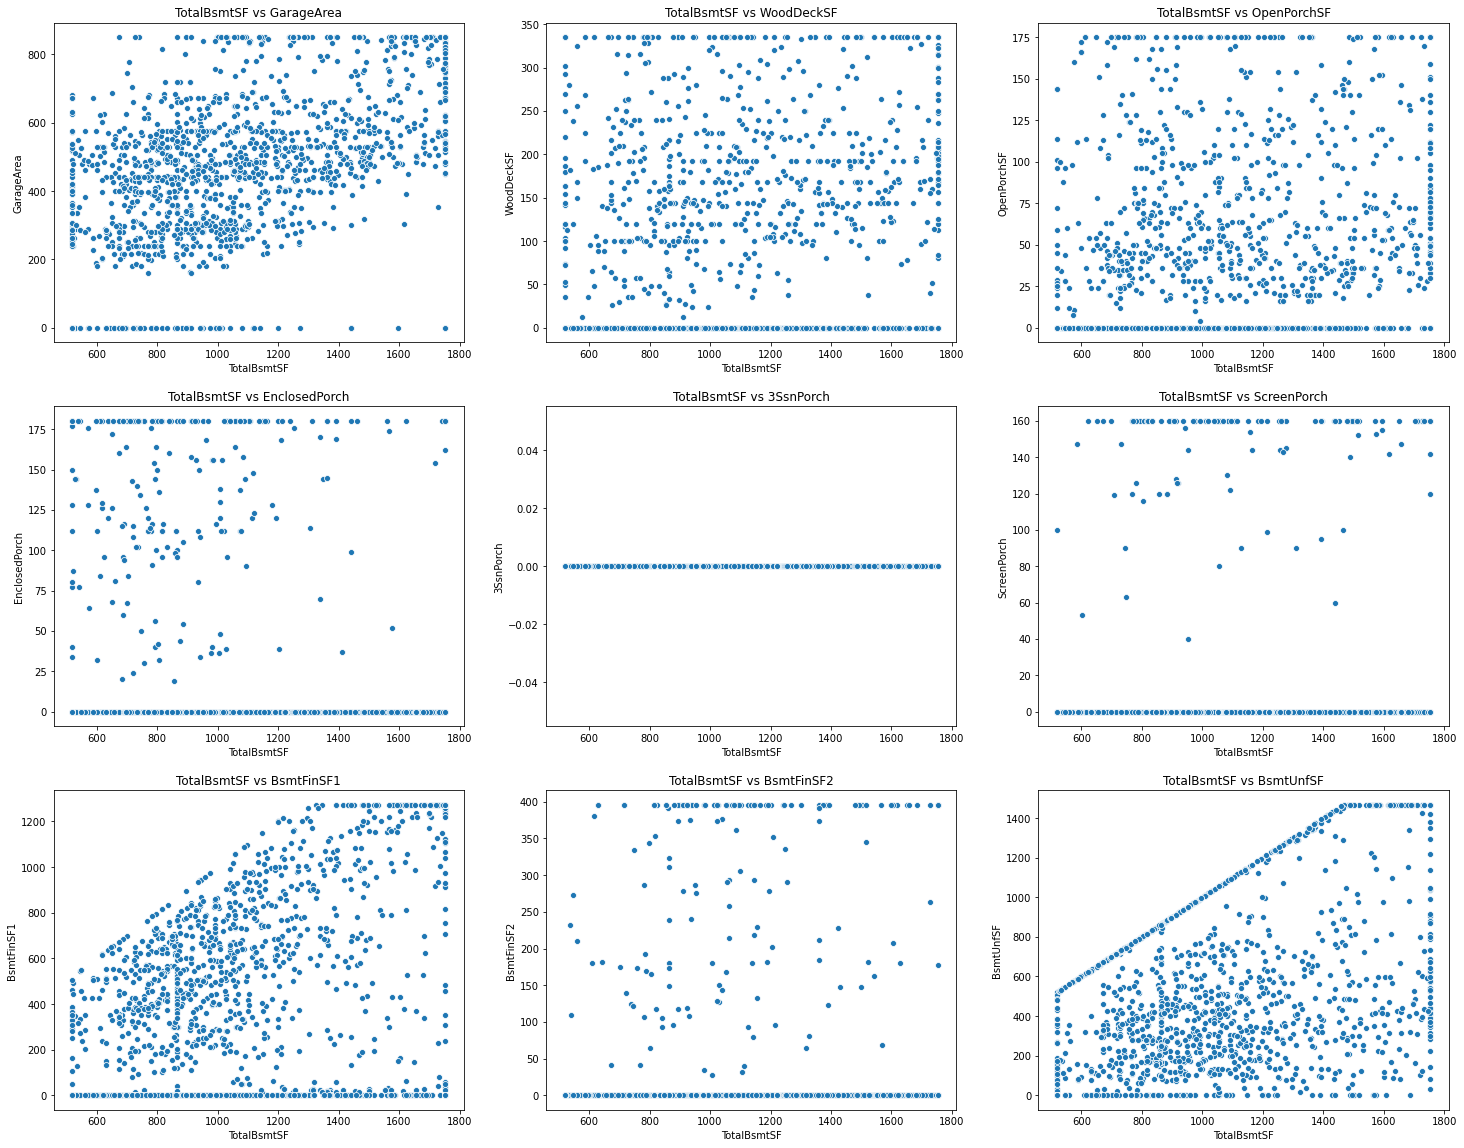

In [146]:
# Comparing 'TotalBsmtSF' with few numerical variables
c = ['GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'BsmtFinSF1', 'BsmtFinSF2', 
     'BsmtUnfSF']
plt.figure(figsize=(25,20))
for i in enumerate(c):
    plt.subplot(3,3,i[0]+1)
    sns.scatterplot(df['TotalBsmtSF'], df[i[1]])
    plt.title('TotalBsmtSF vs ' + i[1])

It is observed that Total Basement Area is randomly related with 'WoodDeckSF', 'BsmtFinSF2' and 'OpenPorchSF'. A slight positive linear relationship is observed among Total Basement Area and 'GarageArea', 'EnclosedPorch' and 'ScreenPorch'. No such relationship is observed with '3SsnPorch'. A Positive linear relationship is observed with 'BsmtFinSF1' and 'BsmtUnfSF'.

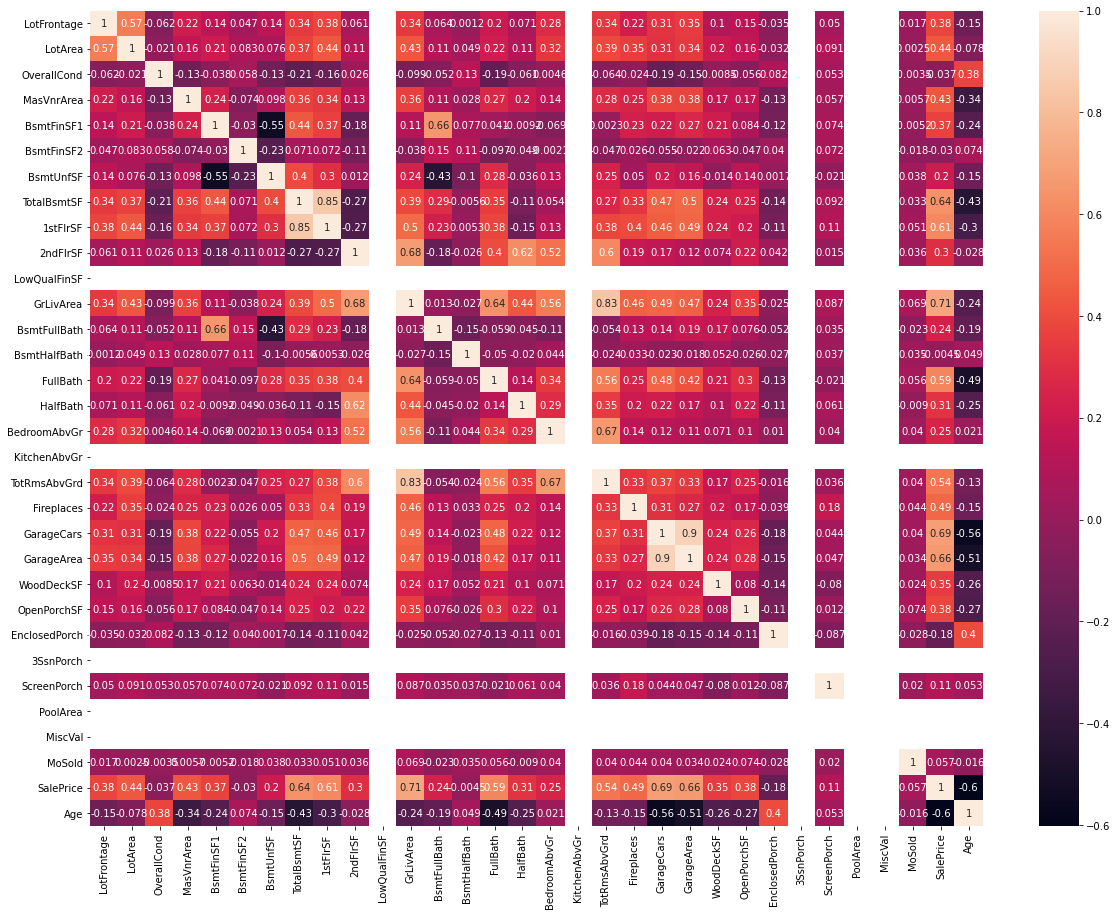

In [147]:
# Plotting heatmap to observe the correlation
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True)

It is observed that columns 'TotalBsmtSF' and '1stFlrSF', 'GrLivArea' and 'TotRmsAbvGrd' and 'GarageCars' and 'GarageArea' are highly correlated so dropping '1stFlrSF', 'GrLivArea' and 'GarageCars' variables from the dataset.

In [148]:
# Dropping '1stFlrSF', 'GrLivArea' and 'GarageCars' from the variables as because they are highly correlated
df.drop(['1stFlrSF', 'GrLivArea', 'GarageCars'], axis=1, inplace=True)

In [149]:
cat_cols = ['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual', 
            'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 
            'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'Fence', 'SaleCondition']

In [150]:
# Creating dummy variables of the categorical columns
dum_cols = pd.get_dummies(df[cat_cols], drop_first=True)

In [151]:
# Checking the head()
dum_cols.head()

MSSubClass_30  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_80  \
0              0              0              1              0              0   
1              0              0              0              0              0   
2              0              0              1              0              0   
3              0              0              0              1              0   
4              0              0              1              0              0   

   MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_190  \
0              0               0               0               0   
1              0               0               0               0   
2              0               0               0               0   
3              0               0               0               0   
4              0               0               0               0   

   MSSubClass_Others  MSZoning_RL  MSZoning_RM  LotShape_Others  LotShape_Reg  \
0                  0            1            0                0             1   
1                  0            1            0                0             1   
2                  0            1            0                0             0   
3                  0            1            0                0             0   
4                  0            1            0                0             0   

   LotConfig_Inside  LotConfig_Others  Neighborhood_BrDale  \
0                 1                 0                    0   
1                 0                 1                    0   
2                 1                 0                    0   
3                 0                 0                    0   
4                 0                 1                    0   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                     0                     0                     1   
1                     0                     0                     0   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     0   

   Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     1                     0                     0   
4                     0                     0                     0   

   Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   

   Neighborhood_NAmes  Neighborhood_NWAmes  Neighborhood_NoRidge  \
0                   0                    0                     0   
1                   0                    0                     0   
2                   0                    0                     0   
3                   0                    0                     0   
4                   0                    0                     1   

   Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_Others  \
0                     0                     0                    0   
1                     0                     0                    1   
2                     0                     0                    0   
3                     0                     0                    0   
4                     0                     0                    0   

   Neighborhood_SWISU  Neighborhood_Sawyer  Neighborhood_SawyerW  \
0                   0                    0                     0   
1           

In [152]:
# Concating the dum_cols with the original dataframe 'df'
df = pd.concat([df,dum_cols], axis=1)

In [153]:
# Creating dummy variable for 'OverallCond' and 'MoSold' variables and concating it with original dataframe 'df'
dum1 = pd.get_dummies(df['OverallCond'], prefix='OverallCond', drop_first=True)
df = pd.concat([df,dum1], axis=1)

dum2 = pd.get_dummies(df['MoSold'], prefix='MoSold', drop_first=True)
df = pd.concat([df,dum2], axis=1)

In [154]:
# Dropping the variables whose dummy variables has been created
cat_cols = ['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual', 
            'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 
            'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'Fence', 'SaleCondition', 
            'OverallCond', 'MoSold']
df.drop(cat_cols, axis=1, inplace=True)

In [155]:
# Checking the head
df.head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0   8450.0       196.0         706         0.0        150   
1         80.0   9600.0         0.0         978         0.0        284   
2         68.0  11250.0       162.0         486         0.0        434   
3         60.0   9550.0         0.0         216         0.0        540   
4         84.0  14260.0       350.0         655         0.0        490   

   TotalBsmtSF  2ndFlrSF  LowQualFinSF  BsmtFullBath  BsmtHalfBath  FullBath  \
0        856.0     854.0             0             1             0         2   
1       1262.0       0.0             0             0             1         2   
2        920.0     866.0             0             1             0         2   
3        756.0     756.0             0             1             0         1   
4       1145.0    1053.0             0             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageArea  \
0         1             3             1             8           0       548.0   
1         0             3             1             6           1       460.0   
2         1             3             1             6           1       608.0   
3         0             3             1             7           1       642.0   
4         1             4             1             9           1       836.0   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0           0         61.0           0.00          0            0         0   
1         298          0.0           0.00          0            0         0   
2           0         42.0           0.00          0            0         0   
3           0         35.0         180.15          0            0         0   
4         192         84.0           0.00          0            0         0   

   MiscVal  SalePrice  Age  MSSubClass_30  MSSubClass_50  MSSubClass_60  \
0        0  12.247694   18              0              0              1   
1        0  12.109011   45              0              0              0   
2        0  12.317167   20              0              0              1   
3        0  11.849398  105              0              0              0   
4        0  12.429216   21              0              0              1   

   MSSubClass_70  MSSubClass_80  MSSubClass_90  MSSubClass_120  \
0              0              0              0               0   
1              0              0              0               0   
2              0              0              0               0   
3              1              0              0               0   
4              0              0              0               0   

   MSSubClass_160  MSSubClass_190  MSSubClass_Others  MSZoning_RL  \
0               0               0                  0            1   
1               0               0                  0            1   
2               0               0                  0            1   
3               0               0                  0            1   
4               0               0                  0            1   

   MSZoning_RM  LotShape_Others  LotShape_Reg  LotConfig_Inside  \
0            0                0             1                 1   
1            0                0             1                 0   
2            0                0             0                 1   
3            0                0             0                 0   
4            0                0             0                 0   

   LotConfig_Others  Neighborhood_BrDale  Neighborhood_BrkSide  \
0                 0                    0                     0   
1                 1                    0                     0   
2                 0                    0                     0   
3                 0                    0                     0   
4                 1                    0                     0   

   Neighborhood_ClearCr  Neighborhood_CollgCr  Neigh

In [156]:
# Checking the shape
df.shape

(1460, 152)

In [157]:
# Checking the correlation of variables greater than equal to 0.80
df.corr()[df.corr()>=0.80]

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  \
LotFrontage                       1.0      NaN         NaN         NaN   
LotArea                           NaN      1.0         NaN         NaN   
MasVnrArea                        NaN      NaN         1.0         NaN   
BsmtFinSF1                        NaN      NaN         NaN         1.0   
BsmtFinSF2                        NaN      NaN         NaN         NaN   
BsmtUnfSF                         NaN      NaN         NaN         NaN   
TotalBsmtSF                       NaN      NaN         NaN         NaN   
2ndFlrSF                          NaN      NaN         NaN         NaN   
LowQualFinSF                      NaN      NaN         NaN         NaN   
BsmtFullBath                      NaN      NaN         NaN         NaN   
BsmtHalfBath                      NaN      NaN         NaN         NaN   
FullBath                          NaN      NaN         NaN         NaN   
HalfBath                          NaN      NaN         NaN         NaN   
BedroomAbvGr                      NaN      NaN         NaN         NaN   
KitchenAbvGr                      NaN      NaN         NaN         NaN   
TotRmsAbvGrd                      NaN      NaN         NaN         NaN   
Fireplaces                        NaN      NaN         NaN         NaN   
GarageArea                        NaN      NaN         NaN         NaN   
WoodDeckSF                        NaN      NaN         NaN         NaN   
OpenPorchSF                       NaN      NaN         NaN         NaN   
EnclosedPorch                     NaN      NaN         NaN         NaN   
3SsnPorch                         NaN      NaN         NaN         NaN   
ScreenPorch                       NaN      NaN         NaN         NaN   
PoolArea                          NaN      NaN         NaN         NaN   
MiscVal                           NaN      NaN         NaN         NaN   
SalePrice                         NaN      NaN         NaN         NaN   
Age                               NaN      NaN         NaN         NaN   
MSSubClass_30                     NaN      NaN         NaN         NaN   
MSSubClass_50                     NaN      NaN         NaN         NaN   
MSSubClass_60                     NaN      NaN         NaN         NaN   
MSSubClass_70                     NaN      NaN         NaN         NaN   
MSSubClass_80                     NaN      NaN         NaN         NaN   
MSSubClass_90                     NaN      NaN         NaN         NaN   
MSSubClass_120                    NaN      NaN         NaN         NaN   
MSSubClass_160                    NaN      NaN         NaN         NaN   
MSSubClass_190                    NaN      NaN         NaN         NaN   
MSSubClass_Others                 NaN      NaN         NaN         NaN   
MSZoning_RL                       NaN      NaN         NaN         NaN   
MSZoning_RM                       NaN      NaN         NaN         NaN   
LotShape_Others                   NaN      NaN         NaN         NaN   
LotShape_Reg                      NaN      NaN         NaN         NaN   
LotConfig_Inside                  NaN      NaN         NaN         NaN   
LotConfig_Others                  NaN      NaN         NaN         NaN   
Neighborhood_BrDale               NaN      NaN         NaN         NaN   
Neighborhood_BrkSide              NaN      NaN         NaN         NaN   
Neighborhood_ClearCr              NaN      NaN         NaN         NaN   
Neighborhood_CollgCr              NaN      NaN         NaN         NaN   
Neighborhood_Crawfor              NaN      NaN         NaN         NaN   
Neighborhood_Edwards              NaN      NaN         NaN         NaN   
Neighborhood_Gilbert              NaN      NaN         NaN         NaN   
Neighborhood_IDOTRR               NaN      NaN         NaN         NaN   
Neighborhood_MeadowV              NaN      NaN         NaN         NaN   
Neighborhood_Mitchel              NaN      NaN         NaN         NaN   
Neighborhood_NAmes            

In [158]:
# Checking the correlation of variables less than equal to -0.80
df.corr()[df.corr()<=-0.80]

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  \
LotFrontage                       NaN      NaN         NaN         NaN   
LotArea                           NaN      NaN         NaN         NaN   
MasVnrArea                        NaN      NaN         NaN         NaN   
BsmtFinSF1                        NaN      NaN         NaN         NaN   
BsmtFinSF2                        NaN      NaN         NaN         NaN   
BsmtUnfSF                         NaN      NaN         NaN         NaN   
TotalBsmtSF                       NaN      NaN         NaN         NaN   
2ndFlrSF                          NaN      NaN         NaN         NaN   
LowQualFinSF                      NaN      NaN         NaN         NaN   
BsmtFullBath                      NaN      NaN         NaN         NaN   
BsmtHalfBath                      NaN      NaN         NaN         NaN   
FullBath                          NaN      NaN         NaN         NaN   
HalfBath                          NaN      NaN         NaN         NaN   
BedroomAbvGr                      NaN      NaN         NaN         NaN   
KitchenAbvGr                      NaN      NaN         NaN         NaN   
TotRmsAbvGrd                      NaN      NaN         NaN         NaN   
Fireplaces                        NaN      NaN         NaN         NaN   
GarageArea                        NaN      NaN         NaN         NaN   
WoodDeckSF                        NaN      NaN         NaN         NaN   
OpenPorchSF                       NaN      NaN         NaN         NaN   
EnclosedPorch                     NaN      NaN         NaN         NaN   
3SsnPorch                         NaN      NaN         NaN         NaN   
ScreenPorch                       NaN      NaN         NaN         NaN   
PoolArea                          NaN      NaN         NaN         NaN   
MiscVal                           NaN      NaN         NaN         NaN   
SalePrice                         NaN      NaN         NaN         NaN   
Age                               NaN      NaN         NaN         NaN   
MSSubClass_30                     NaN      NaN         NaN         NaN   
MSSubClass_50                     NaN      NaN         NaN         NaN   
MSSubClass_60                     NaN      NaN         NaN         NaN   
MSSubClass_70                     NaN      NaN         NaN         NaN   
MSSubClass_80                     NaN      NaN         NaN         NaN   
MSSubClass_90                     NaN      NaN         NaN         NaN   
MSSubClass_120                    NaN      NaN         NaN         NaN   
MSSubClass_160                    NaN      NaN         NaN         NaN   
MSSubClass_190                    NaN      NaN         NaN         NaN   
MSSubClass_Others                 NaN      NaN         NaN         NaN   
MSZoning_RL                       NaN      NaN         NaN         NaN   
MSZoning_RM                       NaN      NaN         NaN         NaN   
LotShape_Others                   NaN      NaN         NaN         NaN   
LotShape_Reg                      NaN      NaN         NaN         NaN   
LotConfig_Inside                  NaN      NaN         NaN         NaN   
LotConfig_Others                  NaN      NaN         NaN         NaN   
Neighborhood_BrDale               NaN      NaN         NaN         NaN   
Neighborhood_BrkSide              NaN      NaN         NaN         NaN   
Neighborhood_ClearCr              NaN      NaN         NaN         NaN   
Neighborhood_CollgCr              NaN      NaN         NaN         NaN   
Neighborhood_Crawfor              NaN      NaN         NaN         NaN   
Neighborhood_Edwards              NaN      NaN         NaN         NaN   
Neighborhood_Gilbert              NaN      NaN         NaN         NaN   
Neighborhood_IDOTRR               NaN      NaN         NaN         NaN   
Neighborhood_MeadowV              NaN      NaN         NaN         NaN   
Neighborhood_Mitchel              NaN      NaN         NaN         NaN   
Neighborhood_NAmes            

From the above two correlation matrix few variables are found highly correlated. So, dropping some of the features among them

In [159]:
# Dropping highly correlated variables
corr_col = ['2ndFlrSF', 'MSSubClass_80', 'MSSubClass_Others', 'Exterior2nd_HdBoard', 'Exterior2nd_MetalSd', 
            'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'BsmtQual_No_Basement', 'BsmtFinType1_No_Basement', 
            'GarageType_No_Garage', 'FireplaceQu_No_Fireplace', 'MSZoning_RL']
df.drop(corr_col, axis=1, inplace=True)

In [160]:
# Splitting the dataset into train and test set
df_train, df_test = train_test_split(df, test_size=30, random_state=42)

In [161]:
# Standardizing the numericals columns of the dataset

num_cols = ['LotFrontage','LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 
            'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 
            'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'Age',  'LowQualFinSF', 'KitchenAbvGr', '3SsnPorch', 'PoolArea', 'MiscVal']
scaler = StandardScaler()
df_train[num_cols] = scaler.fit_transform(df_train[num_cols])

In [162]:
df_train.head()

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
184      1.388778 -0.651010   -0.659732   -1.051190   -0.326351  -0.119982   
554      0.963501  0.270258    1.408434    1.045157   -0.326351  -1.015941   
1173     2.117824  2.229044   -0.659732   -0.683240    3.637109   1.019236   
76      -0.008561 -0.351244   -0.659732   -0.499265   -0.326351   0.409887   
906      2.117824  1.101626    0.813482   -0.898684   -0.326351   2.201806   

      TotalBsmtSF  LowQualFinSF  BsmtFullBath  BsmtHalfBath  FullBath  \
184     -1.542430           0.0     -0.841714     -0.241816 -1.023937   
554     -0.167858           0.0      1.188052     -0.241816  0.788229   
1173     1.555023           0.0     -0.841714     -0.241816  2.600395   
76      -0.299946           0.0     -0.841714     -0.241816 -1.023937   
906      1.626810           0.0      1.188052     -0.241816  0.788229   

      HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
184  -0.763948      0.169095           0.0     -0.992272   -0.964840   
554   1.222317      0.169095           0.0      0.982147    0.613788   
1173 -0.763948      0.169095           0.0      2.298426    0.613788   
76   -0.763948     -1.342192           0.0     -1.650411   -0.964840   
906  -0.763948      0.169095           0.0      0.982147    0.613788   

      GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
184     0.529694    0.129622    -0.808865      -0.379902        0.0   
554     1.886799    2.095427     0.352897      -0.379902        0.0   
1173   -2.322156    0.293439    -0.808865      -0.379902        0.0   
76     -0.920987   -0.816877    -0.808865      -0.379902        0.0   
906     1.886799   -0.816877     0.315421      -0.379902        0.0   

      ScreenPorch  PoolArea  MiscVal  SalePrice       Age  MSSubClass_30  \
184     -0.289222       0.0      0.0  11.751942  1.930536              0   
554     -0.289222       0.0      0.0  12.556730 -1.082044              0   
1173    -0.289222       0.0      0.0  12.208570  0.891715              0   
76      -0.289222       0.0      0.0  11.818570  0.545441              0   
906     -0.289222       0.0      0.0  12.449019 -1.185926              0   

      MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_90  \
184               1              0              0              0   
554               0              1              0              0   
1173              1              0              0              0   
76                0              0              0              0   
906               0              0              0              0   

      MSSubClass_120  MSSubClass_160  MSSubClass_190  MSZoning_RM  \
184                0               0               0            0   
554                0               0               0            0   
1173               0               0               0            0   
76                 0               0               0            0   
906                0               0               0            0   

      LotShape_Others  LotShape_Reg  LotConfig_Inside  LotConfig_Others  \
184                 0             0                 1                 0   
554                 0             1                 1                 0   
1173                0             0                 1                 0   
76                  0             0                 1                 0   
906                 0             0                 0                 0   

      Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  \
184                     0                     1                     0   
554                     0                     0                     0   
1173                    0                     0                     1   
76                      0                     0                     0   
906                     0                     0                     0   

      Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwa

In [163]:
# Dividing into X and y set for model building
y_train = df_train.pop('SalePrice')
X_train = df_train

In [164]:
X_train.shape

(1430, 139)

In [165]:
# Fitting a Linear Regression with automated feature selection process 'RFE' for reducing the features
lr = LinearRegression()
lr.fit(X_train, y_train)

rfe = RFE(lr, 50)
rfe = rfe.fit(X_train, y_train)

In [166]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 76),
 ('LotArea', False, 15),
 ('MasVnrArea', False, 84),
 ('BsmtFinSF1', False, 23),
 ('BsmtFinSF2', False, 77),
 ('BsmtUnfSF', False, 72),
 ('TotalBsmtSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('BsmtFullBath', False, 64),
 ('BsmtHalfBath', False, 90),
 ('FullBath', False, 7),
 ('HalfBath', False, 9),
 ('BedroomAbvGr', False, 71),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', False, 6),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 46),
 ('OpenPorchSF', False, 68),
 ('EnclosedPorch', False, 66),
 ('3SsnPorch', True, 1),
 ('ScreenPorch', False, 45),
 ('PoolArea', True, 1),
 ('MiscVal', True, 1),
 ('Age', True, 1),
 ('MSSubClass_30', True, 1),
 ('MSSubClass_50', False, 56),
 ('MSSubClass_60', False, 36),
 ('MSSubClass_70', False, 5),
 ('MSSubClass_90', True, 1),
 ('MSSubClass_120', False, 44),
 ('MSSubClass_160', False, 3),
 ('MSSubClass_190', False, 69),
 ('MSZoning_RM', False, 16),
 ('LotShape_Others', False, 59),
 ('LotShape_Reg'

In [167]:
# Creating a list of columns supported by RFE
col = X_train.columns[rfe.support_]
col

Index(['TotalBsmtSF', 'LowQualFinSF', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'GarageArea', '3SsnPorch', 'PoolArea', 'MiscVal', 'Age',
       'MSSubClass_30', 'MSSubClass_90', 'Neighborhood_BrDale',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'BldgType_Others', 'HouseStyle_1Story', 'OverallQual_7',
       'OverallQual_8', 'OverallQual_Others', 'Exterior1st_CemntBd',
       'Exterior1st_HdBoard', 'Exterior1st_MetalSd', 'Exterior1st_Others',
       'Exterior1st_Plywood', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng',
       'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtExposure_Gd',
       'BsmtExposure_No_Basement', 'HeatingQC_Others', 'KitchenQual_Others',
       'SaleCondition_Normal', 'SaleCondition_Partial', 'OverallCond_2',
       'OverallCond_3', 'OverallCond_4', 'OverallCond_5', 'Ov

In [168]:
# Creating a new train set with RFE selected features
X_train_rfe = X_train[col]

In [169]:
# Checking the 
X_train_rfe.shape

(1430, 50)

### Ridge Regression

In [170]:
# Applying Ridge Regression with hyperparameter tuning
ridge=Ridge()
parameters={'alpha':[0.001, 0.01, 0.1, 0.5, 1, 2, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100, 200, 500]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='r2',cv=5)
ridge_regressor.fit(X_train_rfe,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.5, 1, 2, 5, 10, 20, 30,
                                   35, 40, 45, 50, 55, 100, 200, 500]},
             scoring='r2')

In [171]:
# Printing the best parameter and score
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 0.001}
0.8531098811382888


In [172]:
# Applying Ridge Regression with the best parameter and printing the column names alongwith their coefficients
alpha = 0.001
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
print(list(zip(X_train_rfe.columns, ridge.coef_)))

[('TotalBsmtSF', 0.11427467031434614), ('LowQualFinSF', 0.0), ('KitchenAbvGr', 0.0), ('TotRmsAbvGrd', 0.09017195366431374), ('GarageArea', 0.05849552274887415), ('3SsnPorch', 0.0), ('PoolArea', 0.0), ('MiscVal', 0.0), ('Age', -0.0996528061194079), ('MSSubClass_30', -0.061385365707317), ('MSSubClass_90', -0.11231242241052555), ('Neighborhood_BrDale', -0.10877964813719401), ('Neighborhood_Crawfor', 0.1937268582425291), ('Neighborhood_Edwards', -0.06289643285438054), ('Neighborhood_IDOTRR', -0.1813614423888737), ('Neighborhood_MeadowV', -0.23406243554209613), ('Neighborhood_NoRidge', 0.1828545619800044), ('Neighborhood_NridgHt', 0.10543063079771871), ('Neighborhood_OldTown', -0.07560402255728638), ('Neighborhood_Somerst', 0.06616591679090106), ('Neighborhood_StoneBr', 0.2095331673531757), ('BldgType_Others', -0.08266529072360919), ('HouseStyle_1Story', -0.1113946151681019), ('OverallQual_7', 0.06809275758660334), ('OverallQual_8', 0.08882727085184126), ('OverallQual_Others', 0.06289194397

In [173]:
# Sorting the ridge coefficients
print(sorted(ridge.coef_, reverse=True))

[0.6861140560309003, 0.5545155330455668, 0.5489308035348368, 0.4784918965393597, 0.41860920339613505, 0.3410125264858614, 0.2095331673531757, 0.1937268582425291, 0.19102113274547527, 0.1828545619800044, 0.16845856275414986, 0.11594862495659945, 0.11427467031434614, 0.10543063079771871, 0.09017195366431374, 0.08882727085184126, 0.07115917877074061, 0.06809275758660334, 0.06771180086205603, 0.06616591679090106, 0.06289194397894142, 0.05876882378961325, 0.05849552274887415, 0.0, 0.0, 0.0, 0.0, 0.0, -0.061385365707317, -0.06289643285438054, -0.07308556322181373, -0.07560402255728638, -0.08266529072360919, -0.08274986287009554, -0.0906592769618737, -0.09732266502782612, -0.0996528061194079, -0.10838042677988921, -0.10877964813719401, -0.1113946151681019, -0.11231242241052555, -0.11606909021114888, -0.13226266174433404, -0.1326173397574058, -0.13875397448224563, -0.13940003779695367, -0.1397256850826339, -0.1408146115536163, -0.1813614423888737, -0.23406243554209613]


#### Top ten features by Ridge Regression are: OverallCond_9, OverallCond_8, OverallCond_7, OverallCond_6, OverallCond_5, OverallCond_4, Neighborhood_StoneBr, Neighborhood_Crawfor, OverallCond_2, Neighborhood_NoRidge

In [174]:
# Applying Lasso Regression with hyperparameter tuning
lasso=Lasso()
parameters={'alpha':[0.001, 0.01, 0.1, 0.5, 1, 2, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100, 200, 500]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='r2',cv=5)
lasso_regressor.fit(X_train_rfe,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.5, 1, 2, 5, 10, 20, 30,
                                   35, 40, 45, 50, 55, 100, 200, 500]},
             scoring='r2')

In [175]:
# Printing the best parameter and score
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.001}
0.841933495845294


In [176]:
# Applying Lasso Regression with best parameter and printing the column names alongwith their coefficients
alpha = 0.001
lasso=Lasso(alpha=alpha)

lasso.fit(X_train_rfe, y_train)
print(list(zip(X_train_rfe.columns, lasso.coef_)))

[('TotalBsmtSF', 0.12991611846359002), ('LowQualFinSF', 0.0), ('KitchenAbvGr', 0.0), ('TotRmsAbvGrd', 0.09379701689329009), ('GarageArea', 0.06566592050279561), ('3SsnPorch', 0.0), ('PoolArea', 0.0), ('MiscVal', 0.0), ('Age', -0.1082536863786067), ('MSSubClass_30', -0.04565464364512261), ('MSSubClass_90', -0.08853483341317762), ('Neighborhood_BrDale', -0.0), ('Neighborhood_Crawfor', 0.19930263813782056), ('Neighborhood_Edwards', -0.04769007729152938), ('Neighborhood_IDOTRR', -0.13352624727002066), ('Neighborhood_MeadowV', -0.13475843041155217), ('Neighborhood_NoRidge', 0.12482135926610717), ('Neighborhood_NridgHt', 0.09522156233912006), ('Neighborhood_OldTown', -0.0394881562110025), ('Neighborhood_Somerst', 0.04059214866618523), ('Neighborhood_StoneBr', 0.13520145203510345), ('BldgType_Others', -0.11102260928569849), ('HouseStyle_1Story', -0.11656633080901155), ('OverallQual_7', 0.05790680077775774), ('OverallQual_8', 0.08427429987307315), ('OverallQual_Others', 0.04518546106233353), (

In [177]:
# Sorting the coefficients
print(sorted(lasso.coef_, reverse=True))

[0.19930263813782056, 0.1861393445007622, 0.13520145203510345, 0.12991611846359002, 0.12482135926610717, 0.11853931475409765, 0.11430101318970035, 0.10772442494856557, 0.09522156233912006, 0.09379701689329009, 0.08427429987307315, 0.06566592050279561, 0.058845923798136024, 0.05867005381242747, 0.05824651496183312, 0.05790680077775774, 0.04646527361364637, 0.04518546106233353, 0.04059214866618523, 0.007863222677926864, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.007011821870362922, -0.010503793347232346, -0.019600179304970766, -0.02446457518735719, -0.027858967726551935, -0.0394881562110025, -0.04106611631084582, -0.04565464364512261, -0.047575694068542895, -0.04769007729152938, -0.06547026821251363, -0.08853483341317762, -0.1082536863786067, -0.11102260928569849, -0.11656633080901155, -0.13352624727002066, -0.13475843041155217, -0.2094357792314826]


#### Top ten features from Lasso Regression are: Neighborhood_Crawfor, OverallCond_9, Neighborhood_StoneBr, TotalBsmtSF, Neighborhood_NoRidge, OverallCond_7, OverallCond_8, BsmtExposure_Gd, Neighborhood_NridgHt, TotRmsAbvGrd, 

In [178]:
# Scaling the test data
df_test[num_cols] = scaler.transform(df_test[num_cols])

In [179]:
# Dividing the test data
y_test = df_test.pop('SalePrice')
X_test = df_test

In [180]:
# Assigning the rfe selected columns to the test data
X_test_rfe = X_test[col]

In [181]:
# Comparing the train and test score for Ridge Regression
print(ridge.score(X_train_rfe, y_train))
print(ridge.score(X_test_rfe, y_test))

0.8696925569032454
0.894837835295924


In [182]:
# Comparing the train and test score for Lasso Regression
print(lasso.score(X_train_rfe, y_train))
print(lasso.score(X_test_rfe, y_test))

0.8583864371597003
0.8524545146349287


#### After using Ridge and Lasso regression we will use the feature as predicted by the Lasso regression because it  reduces the dimesionality of the model by making the coefficient of some of the features as zero.